# Produisez une étude de marché : Traitement des données


[ Importation des librairies](#Importation-des-librairies)

[Importation des fonctions](#Importation-des-fonctions-créées-au-cours-des-projets-précédents)

#### 1. Fichier pib
* Valeurs manquantes
* Doublons
* Exploration et traitement des données
* Outliers

#### 2. Fichier politique
* Valeurs manquantes
* Doublons
* Exploration et traitement des données
* Outliers

#### 3. Fichier population
* Valeurs manquantes[ KNN imputer](#KNN)
* Doublons
* Calcul du TCAM
* Exploration et traitement des données
* Outliers

#### 4. Fichier prix du poulet ( à la production )
* Valeurs manquantes
* Doublons
* Exploration et traitement des données
* Outliers

[Jointures](#Jointures)

#### 5. Fichier dispo 2017
* Valeurs manquantes
* Doublons
* Exploration et traitement des données
* Outliers

#### 6. Fichier investisements étrangers
* Valeurs manquantes
* Doublons
* Exploration et traitement des données
* Outliers

[Gestions des NAN](#NAN) 

[PIB hab 2017](#PIB-hab-2017)

[Rechercher outliers sur plusieurs dimensions](#outliers)

* Isolation forest


[Matrice de correlation](#MATRICE-DE-CORRELATION)



# Importation des librairies

In [355]:
import pandas as pd                  # importation des librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest

from sklearn.impute import KNNImputer

#from ludo import explore
#from ludo import outlierbox

# Importation des fonctions créées au cours des projets précédents

In [356]:
def explore(d):


    '''Cette fonction permet d explorer un dataframe,  d : est le nom du DataFrame a explorer, recherche de doublon sur chaque colonne'''
  
    print('############################################','\n')
    print('Shape is :........ ',d.shape,'\n')
    print('############################################','\n')
    print('Culumns','\n')
    print(d.columns,'\n')
    print('############################################','\n')
    print(d.info(),'\n')
    print('############################################','\n')
    display(d.describe(include='all',datetime_is_numeric=True))
    print('############################################','\n')
    print('Sum of missing values','\n')
    print(d.isna().sum())
    print('############################################','\n')
    print('Missing values ratio','\n')
    print(d.isna().mean()) # affiche le taux de valeur manquante
    print('############################################')
    print('    RECHERCHE DE DOUBLONS PAR COLONNE       ')
    print('############################################','\n')
    
    #col = d.columns.values  # cree un array contenant le nom des colonnes
    col2 = d.columns.tolist()  # cree une liste contenant le nom des colonnes


    for j in col2:

        var1 = d.duplicated(j).sum()
        print('La colonne', j, 'possede', var1, 'valeurs en double','\n')
        
        
    print('############################################','\n')

    for i in col2:
        
        #print(d.duplicated(col).sum()) # somme des valeurs en double de la colonne sku

        print(d[i].value_counts()) # compte le nombre de valeur  pour chaque colonne
        print('----------------------------------','\n')
        
    print('############################################')
    print('                 F I N                      ')
    print('############################################')




def outlierbox(d,c,z=3):
    
        '''Cette fonction permet de rechercher les valeurs aberantes, d : est le dataframe, c : le nom de la colonne, z : le seuil du zscore'''

        import pandas as pd                  # importation des librairies
        import numpy as np
        import matplotlib.pyplot as plt
        import seaborn as sns
        import datetime as dt
        import scipy.stats as st
    
        d[c].hist(bins=100, color = "orangered")
        plt.title('Distribution de c')
        plt.xlabel(c)
        plt.ylabel('Effectif')
        plt.show()
        
        
        
        Q3 = np.quantile(d[c], 0.75)
        Q2 = np.quantile(d[c], 0.50)
        Q1 = np.quantile(d[c], 0.25)
        Q95 = np.percentile(d[c], 95, interpolation = 'midpoint')

        median = d[c].median() 
        mean = d[c].mean()
        std = d[c].std()   # ecart type
        skew = d[c].skew() # skewness empirique
        kurtosis = d[c].kurtosis() # kurtosis empirique , mesure d aplatissement
        mode= d[c].mode() # valeur la plus frequente

        IQR = Q3 - Q1  

        lower_range = Q1 - 1.5 * IQR # recherche du seuil haut pour determiner les valeurs aberantes
        upper_range = Q3 + 1.5 * IQR # recherche du seuil bas pour determiner les valeurs aberantes


        
        print('La valeur la + frequente est.... ..',mode)
        print('Le skew est........................',round(skew,2))
        print('Le kurtosis est...................',round(kurtosis,2),'\n')
        print('P95 est...............',round(Q95,2))
        print('Quartile 3 est........',round(Q3,2))
        print('Quartile 2 est........',round(Q2,2))
        print('Quartile 1 est........',round(Q1,2))
        print('L interquartile est...',round(IQR,2),'\n')
        print('L ecart type est......',round(std,2))
        print('Le seuil haut est.....',round(upper_range,2))
        print('Le seuil bas est......',round(lower_range,2),'\n')
        print('La mediane est........',median)
        print('La moyenne est........',round(mean,2),'\n')
        print('############################################','\n')
        
        plt.figure(figsize=(10,2))                                      # boxplot
        sns.boxplot(data=d, x=c, color='darkorchid')
        plt.show()
       
        
        #global list_inter, df_inter, list_zscore, df_zscore, df_sans_zout, df_sans_interout

        list_inter = []
        list_zscore = []
        
        


        for i in d[c]:
    
                if ((i > upper_range) or (i < lower_range)): 
                    list_inter.append(i)
                
        list_inter.sort()
        df_inter = d.loc[d[c].isin(list_inter)].sort_values(c)
        mask1 = d[c].isin(list_inter)
        df_sans_interout = d[~mask1]
        
    
                
        print('Selon la methode de l interquartile il y a',len(list_inter),'valeurs aberantes\n')
        #print(list_inter,'\n')
        print('#var 1 : liste contenant les valeurs aberantes\n')
        print('#var 2 : dataframe contenant les valeurs aberantes\n')
        print('#var 3 : dataframe SANS les valeurs aberantes\n')  
        
        print('############################################','\n')
        
        d['zscore'] = st.zscore(d[c], axis=0, ddof=1) # calcul zscore via scipy creation colonne
        #df_zscore = d.loc[d['zscore']>z]
        
        for j in d['zscore']:
    
                if ((j > z) or (j < -z)): 
                    list_zscore.append(j)

        list_zscore.sort()
        df_zscore = d.loc[d['zscore'].isin(list_zscore)].sort_values(c)
        maskz = (d['zscore'] > z ) | (d['zscore'] < -z)
        df_sans_zout = d[~maskz]
        #df_sans_zout = df_sans_zout.drop(['zscore'], axis=1, inplace=True)
        
        print('Selon la methode du zscore, il y a',len(list_zscore),'valeurs aberantes\n')
        #print(list_zscore,'\n')
        print('#var 4 : liste contenant les valeurs aberantes zscore\n')  
        print('#var 5 : dataframe contenant les valeurs aberantes zscore\n')     
        print('#var 6 : dataframe SANS les valeurs aberantes\n')      
        d.drop(['zscore'], axis=1, inplace=True)  # supprime colonne z score
            
    
        return list_inter, df_inter, df_sans_interout, list_zscore, df_zscore, df_sans_zout

### Exploration et traitement du cvs pib

In [357]:
pib = pd.read_csv('pibnew.csv')
pib.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,2,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2014,2014,millions,19550.702567,X,Figure from international organizations,NaN
1,MK,Macro Indicators,2,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2015,2015,millions,18713.048410,X,Figure from international organizations,NaN
2,MK,Macro Indicators,2,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2016,2016,millions,18019.558182,X,Figure from international organizations,NaN
3,MK,Macro Indicators,2,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2017,2017,millions,18896.352021,X,Figure from international organizations,NaN
4,MK,Macro Indicators,2,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2018,2018,millions,18418.848300,X,Figure from international organizations,NaN


In [358]:
#On pivote
pib = pib.pivot_table(index=['Area','Area Code (FAO)'], columns='Year Code', values='Value')

In [359]:
pib

,Year Code,2014,2015,2016,2017,2018
Area,Area Code (FAO),,,,,
Afghanistan,2,19550.702567,18713.048410,18019.558182,18896.352021,18418.848300
Albania,3,13228.240079,11386.924853,11861.356451,13019.729856,15156.439968
Algeria,4,213809.979480,165979.118791,160034.211700,170096.984537,175415.180411
Andorra,6,3267.334446,2788.757749,2894.646184,3000.160225,3218.419456
Angola,7,145712.175328,116193.647513,101123.830010,122123.858628,101353.211652
...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),236,363550.401038,344342.559930,288528.788964,247930.222859,204043.723389
Viet Nam,237,186204.652922,193241.122949,205276.171343,223779.866149,245213.680636
Yemen,249,33224.132578,26660.296291,22037.331604,20739.380619,22902.937063


On cherche les lignes en double

In [360]:
doublons = pib[pib.duplicated()]

In [361]:
doublons

,Year Code,2014,2015,2016,2017,2018
Area,Area Code (FAO),,,,,


> On explore le fichier pib avec notre fonction pour avoir un aperçu du fichier ( nan, doublons par colonnes, moyennes etc..)

In [362]:
explore(pib)

############################################ 

Shape is :........  (211, 5) 

############################################ 

Culumns 

Int64Index([2014, 2015, 2016, 2017, 2018], dtype='int64', name='Year Code') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 211 entries, ('Afghanistan', 2) to ('Zimbabwe', 181)
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2014    211 non-null    float64
 1   2015    211 non-null    float64
 2   2016    211 non-null    float64
 3   2017    211 non-null    float64
 4   2018    211 non-null    float64
dtypes: float64(5)
memory usage: 12.5+ KB
None 

############################################ 



Year Code,2014,2015,2016,2017,2018
count,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02
mean,4.256212e+05,4.076228e+05,4.142402e+05,4.423486e+05,4.741840e+05
std,1.679009e+06,1.723459e+06,1.764986e+06,1.875628e+06,2.032848e+06
min,3.758715e+01,3.619381e+01,4.129407e+01,4.527661e+01,4.810771e+01
25%,5.854550e+03,5.334704e+03,5.241217e+03,5.593422e+03,6.568384e+03
50%,2.659866e+04,2.343824e+04,2.237357e+04,2.497919e+04,2.626706e+04
75%,2.010499e+05,1.778976e+05,1.773660e+05,1.911765e+05,2.079984e+05
max,1.755069e+07,1.820602e+07,1.869511e+07,1.947962e+07,2.052716e+07


############################################ 

Sum of missing values 

Year Code
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64
############################################ 

Missing values ratio 

Year Code
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
dtype: float64
############################################
    RECHERCHE DE DOUBLONS PAR COLONNE       
############################################ 

La colonne 2014 possede 0 valeurs en double 

La colonne 2015 possede 0 valeurs en double 

La colonne 2016 possede 0 valeurs en double 

La colonne 2017 possede 0 valeurs en double 

La colonne 2018 possede 0 valeurs en double 

############################################ 

1.955070e+04    1
2.059242e+06    1
8.909813e+05    1
1.062089e+04    1
2.013135e+05    1
               ..
1.817967e+04    1
1.229462e+03    1
1.762739e+04    1
3.883920e+06    1
1.949552e+04    1
Name: 2014, Length: 211, dtype: int64
---------------------------------- 

1.871305e+04  

> Pas de valeurs manquantes

### Nous calculons le taux de croissance moyen du pib entre 2014 et 2018

In [363]:
# calculer le TCAM pour chaque ligne (pays)
pib['TCAM_pib'] = ((pib.iloc[:, -1] / pib.iloc[:, 0]) ** (1/len(pib.columns)) - 1) * 100
pib.sort_values('TCAM_pib',ascending=False).head(10)

,Year Code,2014,2015,2016,2017,2018,TCAM_pib
Area,Area Code (FAO),,,,,,
Bangladesh,16,173061.569701,194465.981065,220315.832054,245633.488923,269627.615528,9.272970
Ireland,104,258625.193038,291462.799653,298725.229188,335430.830073,385041.711267,8.284773
Ethiopia,238,54163.248202,63078.657756,72157.653326,76794.516911,80210.345965,8.169579
Iceland,99,17867.662178,17517.210519,20793.168031,24728.285177,26267.063758,8.011192
Cambodia,115,16777.808050,18049.953906,20016.756231,22177.200626,24571.753582,7.929505
Maldives,132,3697.304619,4109.416452,4379.134275,4754.185598,5300.958485,7.471630
Nepal,149,22430.489214,23667.157889,24288.431487,29443.014181,31731.890061,7.184365
Kenya,114,67316.289067,70120.446664,74815.143796,82064.798407,92202.979941,6.493955
Lao People's Democratic Republic,120,13268.421706,14390.446134,15805.692481,17071.172710,18141.664419,6.456350


### Nous gardons egalement le pib de l année 2017, nous verrons plus tard quelles variables nous utiliserons

In [364]:
# Nous supprimons les colonnes
pib = pib.drop(columns=[2014, 2015, 2016, 2018])

In [365]:
pib.rename(columns = {2017: 'Pib_2017'}, inplace = True) 
pib['Pib_2017'] = pib['Pib_2017'] * 1000000


In [366]:
pib.columns.name = None

In [367]:
pib = pib.reset_index(drop=False)

In [368]:
pib.head(5)

,Area,Area Code (FAO),Pib_2017,TCAM_pib
0,Afghanistan,2,1.889635e+10,-1.185649
1,Albania,3,1.301973e+10,2.758801
2,Algeria,4,1.700970e+11,-3.881311
3,Andorra,6,3.000160e+09,-0.301228
4,Angola,7,1.221239e+11,-7.003129


> Recherche des outliers avec notre fonction

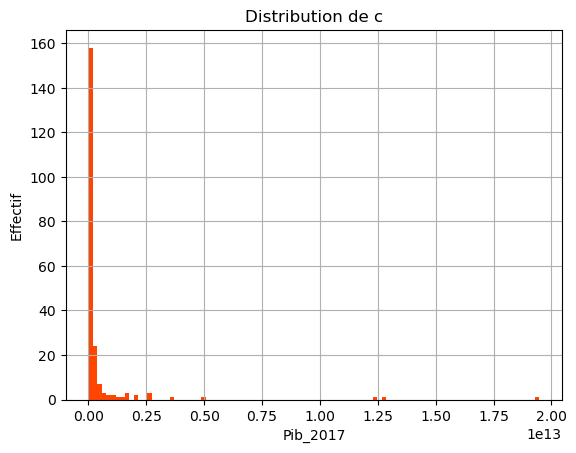

La valeur la + frequente est.... .. 0      4.527661e+07
1      6.010000e+07
2      1.287434e+08
3      1.881978e+08
4      2.130616e+08
           ...     
206    3.690849e+12
207    4.930837e+12
208    1.231049e+13
209    1.270219e+13
210    1.947962e+13
Name: Pib_2017, Length: 211, dtype: float64
Le skew est........................ 7.7
Le kurtosis est................... 66.0 

P95 est............... 1636710216888.5
Quartile 3 est........ 191176475670.0
Quartile 2 est........ 24979190000.0
Quartile 1 est........ 5593422244.5
L interquartile est... 185583053425.5 

L ecart type est...... 1875627704553.71
Le seuil haut est..... 469551055808.25
Le seuil bas est...... -272781157893.75 

La mediane est........ 24979190000.0
La moyenne est........ 442348585026.82 

############################################ 



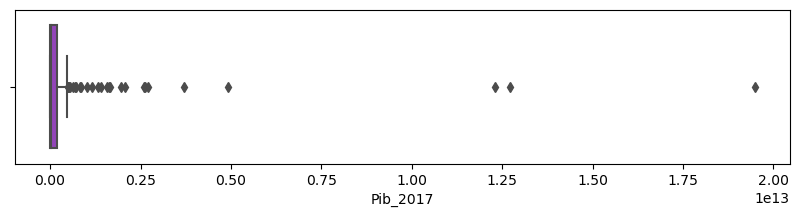

Selon la methode de l interquartile il y a 26 valeurs aberantes

#var 1 : liste contenant les valeurs aberantes

#var 2 : dataframe contenant les valeurs aberantes

#var 3 : dataframe SANS les valeurs aberantes

############################################ 

Selon la methode du zscore, il y a 3 valeurs aberantes

#var 4 : liste contenant les valeurs aberantes zscore

#var 5 : dataframe contenant les valeurs aberantes zscore

#var 6 : dataframe SANS les valeurs aberantes



In [369]:
a,b,c,d,e,f = outlierbox(pib,'Pib_2017',3) # avec z score à 3

> Voici nos 3 valeurs aberantes , nous détectons peut etre une anomalie ( 2 Chine ). Avec notre experience, nous savons que 'China' regroupe potentielement , taiwan, hong kong etc ... Nous gardons en tete ces 2 individus 

In [370]:
e

,Area,Area Code (FAO),Pib_2017,TCAM_pib,zscore
43,"China, mainland",41,1.231049e+13,5.812054,6.327558
40,China,351,1.270219e+13,5.749437,6.536394
202,United States of America,231,1.947962e+13,3.182714,10.149815


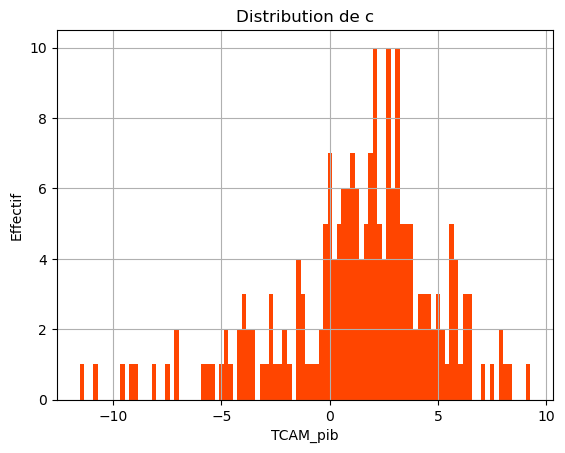

La valeur la + frequente est.... .. 0     -11.542770
1     -10.909433
2      -9.635859
3      -9.137819
4      -8.937884
         ...    
206     7.929505
207     8.011192
208     8.169579
209     8.284773
210     9.272970
Name: TCAM_pib, Length: 211, dtype: float64
Le skew est........................ -0.92
Le kurtosis est................... 1.37 

P95 est............... 6.27
Quartile 3 est........ 3.34
Quartile 2 est........ 1.9
Quartile 1 est........ -0.08
L interquartile est... 3.42 

L ecart type est...... 3.64
Le seuil haut est..... 8.46
Le seuil bas est...... -5.21 

La mediane est........ 1.9019550356096815
La moyenne est........ 1.31 

############################################ 



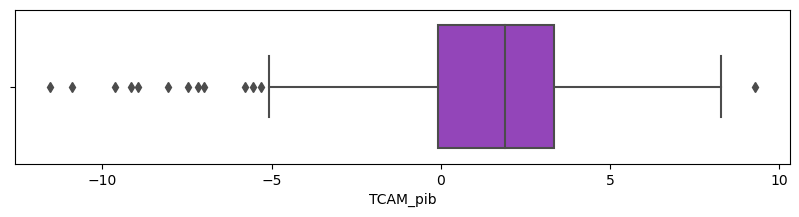

Selon la methode de l interquartile il y a 13 valeurs aberantes

#var 1 : liste contenant les valeurs aberantes

#var 2 : dataframe contenant les valeurs aberantes

#var 3 : dataframe SANS les valeurs aberantes

############################################ 

Selon la methode du zscore, il y a 3 valeurs aberantes

#var 4 : liste contenant les valeurs aberantes zscore

#var 5 : dataframe contenant les valeurs aberantes zscore

#var 6 : dataframe SANS les valeurs aberantes



In [371]:
a,b,c,d,e,f = outlierbox(pib,'TCAM_pib',3) # avec z score à 3

> Voici nos 3 valeurs aberantes selon la methode du z score avec un score de 3

In [372]:
e

,Area,Area Code (FAO),Pib_2017,TCAM_pib,zscore
178,South Sudan,277,3.571365e+09,-11.542770,-3.531648
206,Venezuela (Bolivarian Republic of),236,2.479302e+11,-10.909433,-3.357604
64,Equatorial Guinea,61,1.220091e+10,-9.635859,-3.007621


In [373]:
pib.shape

(211, 4)

### Exploration et traitement du cvs politique

In [374]:
poli = pd.read_csv('polinew.csv')

In [375]:
poli.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2014,2014,index,-2.41,X,Figure from international organizations,NaN
1,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2015,2015,index,-2.57,X,Figure from international organizations,NaN
2,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2016,2016,index,-2.67,X,Figure from international organizations,NaN
3,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2017,2017,index,-2.80,X,Figure from international organizations,NaN
4,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2018,2018,index,-2.76,X,Figure from international organizations,NaN


On pivote la table pour plus de lisibilité

In [376]:
poli = poli.pivot_table(index=['Area','Area Code (FAO)'], columns='Year Code', values='Value').reset_index()


In [377]:
poli.head(2)

Year Code,Area,Area Code (FAO),2014,2015,2016,2017,2018
0,Afghanistan,2,-2.41,-2.57,-2.67,-2.80,-2.76
1,Albania,3,0.49,0.35,0.34,0.38,0.37


In [378]:
doublons = poli[poli.duplicated()]

In [379]:
doublons

Year Code,Area,Area Code (FAO),2014,2015,2016,2017,2018


> Pas de ligne en double

On explore le dataframe avec notre fonction explore :

In [380]:
explore(poli)

############################################ 

Shape is :........  (199, 7) 

############################################ 

Culumns 

Index(['Area', 'Area Code (FAO)', 2014, 2015, 2016, 2017, 2018], dtype='object', name='Year Code') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    object 
 1   Area Code (FAO)  199 non-null    int64  
 2   2014             197 non-null    float64
 3   2015             197 non-null    float64
 4   2016             197 non-null    float64
 5   2017             197 non-null    float64
 6   2018             199 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.0+ KB
None 

############################################ 



Year Code,Area,Area Code (FAO),2014,2015,2016,2017,2018
count,199,199.000000,197.000000,197.000000,197.000000,197.000000,199.000000
unique,199,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,128.326633,-0.056041,-0.059492,-0.057107,-0.061777,-0.057638
std,NaN,75.451361,0.999718,0.996454,0.998774,0.994815,0.995211
min,NaN,1.000000,-2.750000,-2.970000,-2.920000,-2.940000,-3.010000
25%,NaN,62.000000,-0.690000,-0.640000,-0.650000,-0.650000,-0.635000
50%,NaN,127.000000,0.040000,0.020000,0.010000,0.040000,0.020000
75%,NaN,192.000000,0.770000,0.790000,0.750000,0.770000,0.795000


############################################ 

Sum of missing values 

Year Code
Area               0
Area Code (FAO)    0
2014               2
2015               2
2016               2
2017               2
2018               0
dtype: int64
############################################ 

Missing values ratio 

Year Code
Area               0.00000
Area Code (FAO)    0.00000
2014               0.01005
2015               0.01005
2016               0.01005
2017               0.01005
2018               0.00000
dtype: float64
############################################
    RECHERCHE DE DOUBLONS PAR COLONNE       
############################################ 

La colonne Area possede 0 valeurs en double 

La colonne Area Code (FAO) possede 0 valeurs en double 

La colonne 2014 possede 45 valeurs en double 

La colonne 2015 possede 55 valeurs en double 

La colonne 2016 possede 49 valeurs en double 

La colonne 2017 possede 51 valeurs en double 

La colonne 2018 possede 45 valeurs en double 



In [381]:
# créer un masque booléen pour identifier les valeurs manquantes
mask_poli = poli.isna().any(axis=1)

# filtrer le DataFrame pour afficher les lignes avec des NaN
pays_nan_poli = poli[mask_poli]

In [382]:
pays_nan_poli

Year Code,Area,Area Code (FAO),2014,2015,2016,2017,2018
43,Cook Islands,47,NaN,NaN,NaN,NaN,0.86
130,Niue,160,NaN,NaN,NaN,NaN,0.99


Après l'étude de ces deux pays, on décide de les supprimer

In [383]:
poli = poli[~mask_poli] # garde le datframe original sans ces deux individus


Nous calculons une moyenne de l index politique sur 5 ans

In [384]:
poli['indexpolitic'] = poli.iloc[:, 3:].mean(axis=1).round(2) 

In [385]:
poli.columns

Index(['Area', 'Area Code (FAO)', 2014, 2015, 2016, 2017, 2018,
       'indexpolitic'],
      dtype='object', name='Year Code')

In [386]:
#Suppression des colonnes
poli = poli.drop(columns=[2014, 2015, 2016, 2017, 2018])

In [387]:
poli.head(5)

Year Code,Area,Area Code (FAO),indexpolitic
0,Afghanistan,2,-2.70
1,Albania,3,0.36
2,Algeria,4,-0.99
3,American Samoa,5,1.20
4,Andorra,6,1.41


In [388]:
explore(poli)

############################################ 

Shape is :........  (197, 3) 

############################################ 

Culumns 

Index(['Area', 'Area Code (FAO)', 'indexpolitic'], dtype='object', name='Year Code') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 198
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             197 non-null    object 
 1   Area Code (FAO)  197 non-null    int64  
 2   indexpolitic     197 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ KB
None 

############################################ 



Year Code,Area,Area Code (FAO),indexpolitic
count,197,197.000000,197.000000
unique,197,NaN,NaN
top,Afghanistan,NaN,NaN
freq,1,NaN,NaN
mean,NaN,128.578680,-0.061320
std,NaN,75.578248,0.990103
min,NaN,1.000000,-2.860000
25%,NaN,63.000000,-0.660000
50%,NaN,127.000000,0.030000
75%,NaN,193.000000,0.740000


############################################ 

Sum of missing values 

Year Code
Area               0
Area Code (FAO)    0
indexpolitic       0
dtype: int64
############################################ 

Missing values ratio 

Year Code
Area               0.0
Area Code (FAO)    0.0
indexpolitic       0.0
dtype: float64
############################################
    RECHERCHE DE DOUBLONS PAR COLONNE       
############################################ 

La colonne Area possede 0 valeurs en double 

La colonne Area Code (FAO) possede 0 valeurs en double 

La colonne indexpolitic possede 55 valeurs en double 

############################################ 

Afghanistan    1
Netherlands    1
Nicaragua      1
Niger          1
Nigeria        1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: Area, Length: 197, dtype: int64
---------------------------------- 

2      1
150    1
157    1
158    1
159    1
      ..
73     1
79     1
81 

#### Nous n avons pas de doublons ni de valeurs manquantes

Recherchons les outliers avec notre fonction

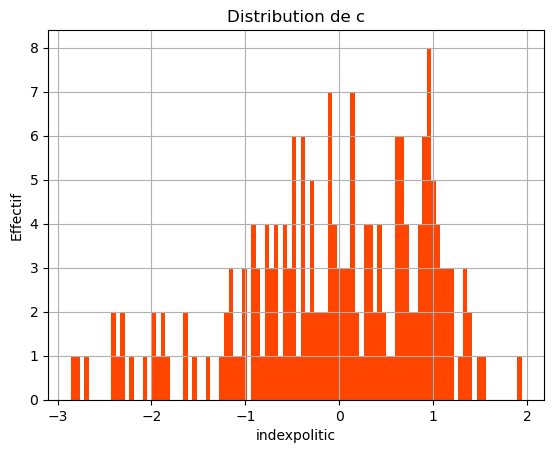

La valeur la + frequente est.... .. 0   -0.4
1    0.9
Name: indexpolitic, dtype: float64
Le skew est........................ -0.67
Le kurtosis est................... 0.05 

P95 est............... 1.2
Quartile 3 est........ 0.74
Quartile 2 est........ 0.03
Quartile 1 est........ -0.66
L interquartile est... 1.4 

L ecart type est...... 0.99
Le seuil haut est..... 2.84
Le seuil bas est...... -2.76 

La mediane est........ 0.03
La moyenne est........ -0.06 

############################################ 



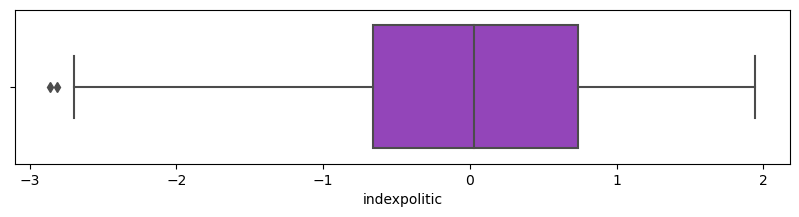

Selon la methode de l interquartile il y a 2 valeurs aberantes

#var 1 : liste contenant les valeurs aberantes

#var 2 : dataframe contenant les valeurs aberantes

#var 3 : dataframe SANS les valeurs aberantes

############################################ 

Selon la methode du zscore, il y a 0 valeurs aberantes

#var 4 : liste contenant les valeurs aberantes zscore

#var 5 : dataframe contenant les valeurs aberantes zscore

#var 6 : dataframe SANS les valeurs aberantes



In [389]:
a,b,c,d,e,f = outlierbox(poli,'indexpolitic',3) # avec z score à 3

In [390]:
b

Year Code,Area,Area Code (FAO),indexpolitic
196,Yemen,249,-2.86
174,Syrian Arab Republic,212,-2.81


Nous avons 2 outliers avec la methode de l interquartile :  Le Yemen et Syrian Arab Republic .

In [391]:
poli.shape

(197, 3)

In [392]:
poli.set_index(['Area', 'Area Code (FAO)'], inplace=True) # defini comme index

In [393]:
poli.columns.name = None

In [394]:
poli.head(5)

,,indexpolitic
Area,Area Code (FAO),
Afghanistan,2,-2.70
Albania,3,0.36
Algeria,4,-0.99
American Samoa,5,1.20
Andorra,6,1.41


### Exploration et traitement du cvs population

In [395]:
# importation des fichiers csv
pop = pd.read_csv('Population_2000_2018.csv')



In [396]:
pop.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [397]:
pop_pivot = pop.pivot_table(index=['Zone','Code zone'], columns='Année', values='Valeur')


In [398]:
pop_pivot.head(5)

,Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,Code zone,,,,,,,,,,,,,,,,,,,
Afghanistan,2,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
Afrique du Sud,202,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518
Albanie,3,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740
Algérie,4,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408
Allemagne,79,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418


In [399]:
doublons = pop_pivot[pop_pivot.duplicated()]

In [400]:
doublons

,Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,Code zone,,,,,,,,,,,,,,,,,,,


> Pas de doublons

### Identifier les pays avec des nan

In [401]:
# créer un masque booléen pour identifier les valeurs manquantes
mask = pop_pivot.isna().any(axis=1)

# filtrer le DataFrame pour afficher les lignes avec des NaN
pays_nan = pop_pivot[mask]

In [402]:
pays_nan

,Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,Code zone,,,,,,,,,,,,,,,,,,,
"Bonaire, Saint-Eustache et Saba",278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.993,22.842,23.505,24.070,24.570,25.020,25.401,25.711
Curaçao,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.315,154.817,156.794,158.422,159.847,161.052,161.997,162.752
Monténégro,273,NaN,NaN,NaN,NaN,NaN,NaN,617.860,619.555,621.320,622.939,624.275,625.270,625.925,626.345,626.645,626.956,627.264,627.563,627.809
Saint-Barthélemy,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.343,9.439,9.537,9.623,9.693,9.748,9.784,9.816
Saint-Martin (partie française),281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.446,37.009,36.453,36.015,35.858,36.065,36.560,37.264
Serbie,272,NaN,NaN,NaN,NaN,NaN,NaN,9145.914,9101.185,9060.103,9023.357,8991.254,8963.769,8940.113,8918.904,8898.289,8876.777,8853.963,8829.628,8802.754
Serbie-et-Monténégro,186,10101.175,10023.939,9959.836,9906.313,9857.775,9810.216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sint Maarten (partie néerlandaise),280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.058,36.241,37.583,38.876,39.968,40.808,41.444,41.940
Soudan,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36193.783,37072.550,37977.655,38902.950,39847.439,40813.397,41801.533


In [403]:
index_list = pays_nan.index.tolist() # Cree une liste avec les index des nan

In [404]:
index_list

[('Bonaire, Saint-Eustache et Saba', 278),
 ('Curaçao', 279),
 ('Monténégro', 273),
 ('Saint-Barthélemy', 282),
 ('Saint-Martin (partie française)', 281),
 ('Serbie', 272),
 ('Serbie-et-Monténégro', 186),
 ('Sint Maarten  (partie néerlandaise)', 280),
 ('Soudan', 276),
 ('Soudan (ex)', 206),
 ('Soudan du Sud', 277)]

# KNN

### Traitement des nan avec KNN imputer

In [405]:
imputervoisin = KNNImputer (n_neighbors=3)
X_voisined = imputervoisin.fit_transform(pop_pivot)

In [406]:
pop_voisined = pd.DataFrame(X_voisined, columns=pop_pivot.columns, index=pop_pivot.index)


In [407]:
pop_voisined.loc[index_list]

,Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,Code zone,,,,,,,,,,,,,,,,,,,
"Bonaire, Saint-Eustache et Saba",278,19.115333,19.362000,19.681333,20.029667,20.368333,20.654000,20.885000,21.068667,21.206333,21.308667,21.380000,21.993000,22.842000,23.505000,24.070000,24.570000,25.020,25.401,25.711000
Curaçao,279,153.500333,154.559000,155.388000,156.105000,156.877667,157.832333,159.012333,160.374000,161.826667,163.208333,164.421000,152.315000,154.817000,156.794000,158.422000,159.847000,161.052,161.997,162.752000
Monténégro,273,477.154333,488.507333,500.090333,511.673667,522.983667,533.838333,617.860000,619.555000,621.320000,622.939000,624.275000,625.270000,625.925000,626.345000,626.645000,626.956000,627.264,627.563,627.809000
Saint-Barthélemy,282,11.475000,11.514000,11.562000,11.605333,11.621333,11.596000,11.519000,11.398333,11.261000,11.144333,11.074667,9.343000,9.439000,9.537000,9.623000,9.693000,9.748,9.784,9.816000
Saint-Martin (partie française),281,28.498333,29.198333,29.972333,30.779667,31.550667,32.245333,32.850333,33.375667,33.848333,34.295667,34.755333,37.446000,37.009000,36.453000,36.015000,35.858000,36.065,36.560,37.264000
Serbie,272,8687.883000,8702.149000,8719.132000,8738.840000,8760.795000,8784.781000,9145.914000,9101.185000,9060.103000,9023.357000,8991.254000,8963.769000,8940.113000,8918.904000,8898.289000,8876.777000,8853.963,8829.628,8802.754000
Serbie-et-Monténégro,186,10101.175000,10023.939000,9959.836000,9906.313000,9857.775000,9810.216000,9924.583333,9936.463333,9953.051667,9972.761667,9994.396000,10017.626667,10042.802000,10070.126667,10099.975667,10132.431667,10167.521,10204.499,10241.772333
Sint Maarten (partie néerlandaise),280,28.498333,29.198333,29.972333,30.779667,31.550667,32.245333,32.850333,33.375667,33.848333,34.295667,34.755333,35.058000,36.241000,37.583000,38.876000,39.968000,40.808,41.444,41.940000
Soudan,276,31083.033333,31456.688000,31837.004333,32228.844333,32637.672667,33067.752667,33522.309000,34002.216000,34506.376667,35032.297667,35578.467667,36141.682667,36193.783000,37072.550000,37977.655000,38902.950000,39847.439,40813.397,41801.533000


#### Nous avons traité les valeurs manquantes en utilisant la méthode du KNN, toutefois, nous garderons une attention particuliere à cette liste de pays tout au long de notre étude. A premiere vue, ce sont de tout petits pays ou des pays assez instable

### CALCUL DU TCAM ( Taux de Croissance Moyen de la population )

In [408]:
# suppression des années avant 2014 pour calculer le taux de croissance annuel moyen de la population sur les 5 dernieres anneés

In [409]:
pop_voisined = pop_voisined.drop(columns=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])


In [410]:
# calculer le TCAM pour chaque ligne (pays)
pop_voisined['TCAM'] = ((pop_voisined.iloc[:, -1] / pop_voisined.iloc[:, 0]) ** (1/len(pop_voisined.columns)) - 1) * 100
pop_voisined.sort_values('TCAM',ascending=False).head(10)


,Année,2014,2015,2016,2017,2018,TCAM
Zone,Code zone,,,,,,
Oman,221,4027.260,4267.348,4479.219,4665.928,4829.473,3.699823
Maldives,132,435.015,454.915,475.512,496.402,515.696,3.461294
Bahreïn,13,1336.075,1371.851,1425.792,1494.076,1569.446,3.272124
Niger,158,19240.179,20001.663,20788.798,21602.382,22442.822,3.127306
Guinée équatoriale,61,1122.277,1168.568,1215.180,1262.002,1308.975,3.125545
Îles Falkland (Malvinas),65,2.792,2.834,2.928,3.068,3.234,2.982853
Ouganda,226,36911.523,38225.453,39649.166,41166.588,42729.036,2.970359
Angola,7,26941.779,27884.381,28842.489,29816.766,30809.787,2.719403
République démocratique du Congo,250,73767.447,76244.544,78789.127,81398.764,84068.091,2.648660


In [411]:
pop_voisined = pop_voisined.drop(columns=[2014, 2015, 2016, 2018])


In [412]:
pop_voisined.rename(columns = {2017: 'pop_2017'}, inplace = True) 

In [413]:
pop_voisined['pop_2017'] = pop_voisined['pop_2017'] * 1000

In [414]:
pop_voisined.columns.name = None


In [415]:
pop_voisined

,,pop_2017,TCAM
Zone,Code zone,,
Afghanistan,2,36296113.0,2.180893
Afrique du Sud,202,57009756.0,1.163683
Albanie,3,2884169.0,-0.093847
Algérie,4,41389189.0,1.643155
Allemagne,79,82658409.0,0.407719
...,...,...,...
Îles Salomon,25,636039.0,2.146691
Îles Turques-et-Caïques,224,37115.0,1.265856
Îles Vierges américaines,240,104751.0,-0.082714


### OUTLIERS avec notre fonction

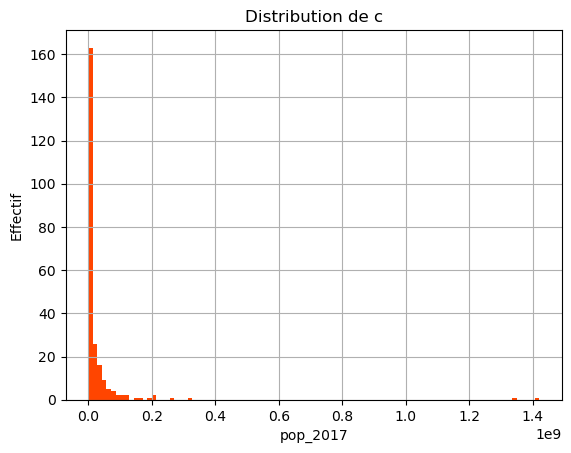

La valeur la + frequente est.... .. 0      7.930000e+02
1      1.300000e+03
2      1.609000e+03
3      3.068000e+03
4      4.984000e+03
           ...     
233    2.079062e+08
234    2.646510e+08
235    3.250848e+08
236    1.338677e+09
237    1.421022e+09
Name: pop_2017, Length: 238, dtype: float64
Le skew est........................ 9.33
Le kurtosis est................... 93.68 

P95 est............... 105786424.5
Quartile 3 est........ 19538785.25
Quartile 2 est........ 5372113.0
Quartile 1 est........ 386234.25
L interquartile est... 19152551.0 

L ecart type est...... 131349793.22
Le seuil haut est..... 48267611.75
Le seuil bas est...... -28342592.25 

La mediane est........ 5372113.0
La moyenne est........ 31966154.69 

############################################ 



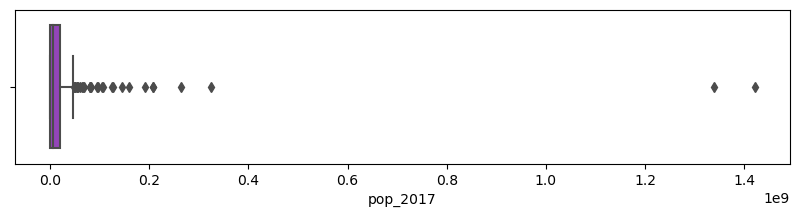

Selon la methode de l interquartile il y a 30 valeurs aberantes

#var 1 : liste contenant les valeurs aberantes

#var 2 : dataframe contenant les valeurs aberantes

#var 3 : dataframe SANS les valeurs aberantes

############################################ 

Selon la methode du zscore, il y a 2 valeurs aberantes

#var 4 : liste contenant les valeurs aberantes zscore

#var 5 : dataframe contenant les valeurs aberantes zscore

#var 6 : dataframe SANS les valeurs aberantes



In [416]:
a,b,c,d,e,f = outlierbox(pop_voisined,'pop_2017',3)

In [417]:
e

,,pop_2017,TCAM,zscore
Zone,Code zone,,,
Inde,100,1.338677e+09,0.865432,9.948327
"Chine, continentale",41,1.421022e+09,0.399718,10.575240


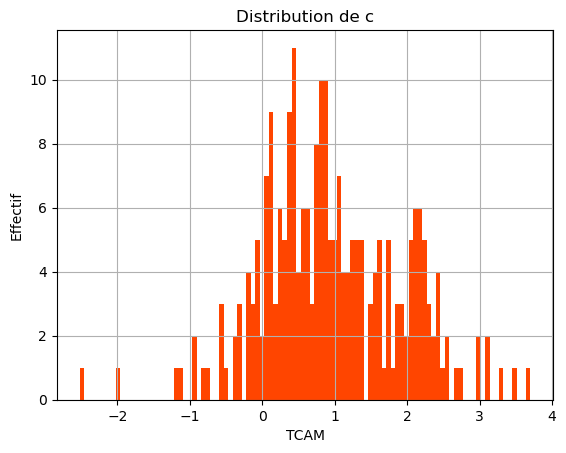

La valeur la + frequente est.... .. 0     -2.521923
1     -1.962879
2     -1.172969
3     -1.125539
4     -0.935191
         ...   
233    3.125545
234    3.127306
235    3.272124
236    3.461294
237    3.699823
Name: TCAM, Length: 238, dtype: float64
Le skew est........................ 0.07
Le kurtosis est................... 0.42 

P95 est............... 2.46
Quartile 3 est........ 1.62
Quartile 2 est........ 0.85
Quartile 1 est........ 0.31
L interquartile est... 1.31 

L ecart type est...... 0.97
Le seuil haut est..... 3.59
Le seuil bas est...... -1.66 

La mediane est........ 0.8508419102061793
La moyenne est........ 0.96 

############################################ 



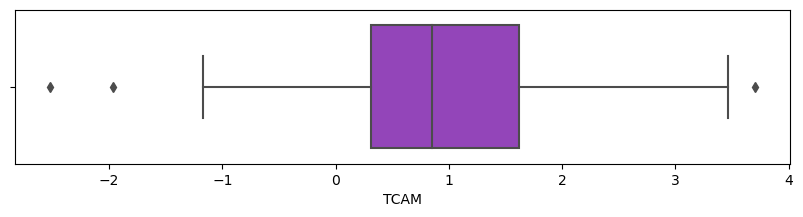

Selon la methode de l interquartile il y a 3 valeurs aberantes

#var 1 : liste contenant les valeurs aberantes

#var 2 : dataframe contenant les valeurs aberantes

#var 3 : dataframe SANS les valeurs aberantes

############################################ 

Selon la methode du zscore, il y a 2 valeurs aberantes

#var 4 : liste contenant les valeurs aberantes zscore

#var 5 : dataframe contenant les valeurs aberantes zscore

#var 6 : dataframe SANS les valeurs aberantes



In [418]:
a,b,c,d,e,f = outlierbox(pop_voisined,'TCAM',3)

In [419]:
b

,,pop_2017,TCAM
Zone,Code zone,,
Porto Rico,177,3163667.0,-2.521923
République arabe syrienne,212,17095678.0,-1.962879
Oman,221,4665928.0,3.699823


In [420]:
explore(pop_voisined)

############################################ 

Shape is :........  (238, 2) 

############################################ 

Culumns 

Index(['pop_2017', 'TCAM'], dtype='object') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 238 entries, ('Afghanistan', 2) to ('Îles Wallis-et-Futuna', 243)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pop_2017  238 non-null    float64
 1   TCAM      238 non-null    float64
dtypes: float64(2)
memory usage: 32.8+ KB
None 

############################################ 



,pop_2017,TCAM
count,2.380000e+02,238.000000
mean,3.196615e+07,0.957349
std,1.313498e+08,0.967023
min,7.930000e+02,-2.521923
25%,3.862342e+05,0.310633
50%,5.372113e+06,0.850842
75%,1.953879e+07,1.623315
max,1.421022e+09,3.699823


############################################ 

Sum of missing values 

pop_2017    0
TCAM        0
dtype: int64
############################################ 

Missing values ratio 

pop_2017    0.0
TCAM        0.0
dtype: float64
############################################
    RECHERCHE DE DOUBLONS PAR COLONNE       
############################################ 

La colonne pop_2017 possede 0 valeurs en double 

La colonne TCAM possede 0 valeurs en double 

############################################ 

3.629611e+07    1
8.139876e+07    1
3.163667e+06    1
1.028853e+07    1
3.144430e+07    1
               ..
9.729823e+06    1
1.338677e+09    1
2.646510e+08    1
8.067388e+07    1
1.190000e+04    1
Name: pop_2017, Length: 238, dtype: int64
---------------------------------- 

 2.180893    1
 2.648660    1
-2.521923    1
-0.312995    1
 1.231428    1
            ..
-0.199658    1
 0.865432    1
 0.964446    1
 1.094817    1
-1.125539    1
Name: TCAM, Length: 238, dtype: int64
-----------

In [421]:
pop_voisined = pop_voisined.reset_index()


In [422]:
pop_voisined

,Zone,Code zone,pop_2017,TCAM
0,Afghanistan,2,36296113.0,2.180893
1,Afrique du Sud,202,57009756.0,1.163683
2,Albanie,3,2884169.0,-0.093847
3,Algérie,4,41389189.0,1.643155
4,Allemagne,79,82658409.0,0.407719
...,...,...,...,...
233,Îles Salomon,25,636039.0,2.146691
234,Îles Turques-et-Caïques,224,37115.0,1.265856
235,Îles Vierges américaines,240,104751.0,-0.082714
236,Îles Vierges britanniques,239,29577.0,0.554714


### Exploration et traitement du cvs prix du poulet ( à la production )

In [423]:
poulet = pd.read_csv('prix_poulet.csv')

In [424]:
poulet.head(5)


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),21121,"Meat of chickens, fresh or chilled",1998,1998,7021,Annual value,USD,1560.1,A,Official figure
1,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),21121,"Meat of chickens, fresh or chilled",1999,1999,7021,Annual value,USD,1815.7,A,Official figure
2,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),21121,"Meat of chickens, fresh or chilled",2000,2000,7021,Annual value,USD,1739.6,A,Official figure
3,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),21121,"Meat of chickens, fresh or chilled",2001,2001,7021,Annual value,USD,1832.9,A,Official figure
4,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),21121,"Meat of chickens, fresh or chilled",2002,2002,7021,Annual value,USD,1990.7,A,Official figure


In [425]:
poulet_pivot = poulet.pivot_table(index=['Area','Area Code (FAO)'], columns='Year', values='Value')


In [426]:
poulet_pivot

,Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Area,Area Code (FAO),,,,,,,,,,,,,,,,,,,,,
Albania,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1560.10,1815.7,1739.60,...,3350.00,3849.00,3605.60,4296.30,2745.7,2412.30,2469.7,2829.80,2755.20,2846.10
Algeria,4,NaN,NaN,NaN,NaN,NaN,2082.2,2044.80,2008.90,1772.5,NaN,...,3249.30,3624.10,3137.30,3102.50,2631.8,2339.10,2180.7,2453.00,2102.10,1881.50
Antigua and Barbuda,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3666.70,3666.7,3666.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,9,1174.05,1118.05,1161.25,1133.65,1070.2,1010.3,890.40,783.40,680.3,680.30,...,1089.50,1016.30,1061.20,1016.10,1516.3,1089.80,1120.0,1089.85,1031.60,637.90
Armenia,1,NaN,NaN,NaN,NaN,NaN,NaN,1591.85,1490.75,1160.8,1099.15,...,2733.25,2622.65,2569.05,2492.25,2316.7,2309.05,2291.5,2345.90,3001.45,2393.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),236,1331.40,1038.20,944.40,897.00,1316.2,1013.7,1234.90,1254.10,1161.6,1098.80,...,2179.80,2960.90,3199.40,4344.40,NaN,NaN,NaN,NaN,NaN,NaN
Viet Nam,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1486.70,...,4186.40,4230.60,4515.70,4465.90,4413.4,4093.10,3852.8,4270.10,4293.00,4405.90
Yemen,249,1490.80,1746.50,2086.65,2215.10,1720.4,1705.7,1701.70,NaN,1412.8,1360.30,...,3323.20,3314.70,NaN,NaN,4621.0,4849.00,5091.4,4503.20,4995.00,4947.10


In [427]:
explore(poulet_pivot)

############################################ 

Shape is :........  (148, 30) 

############################################ 

Culumns 

Int64Index([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Year') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 148 entries, ('Albania', 3) to ('Zimbabwe', 181)
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1991    62 non-null     float64
 1   1992    72 non-null     float64
 2   1993    85 non-null     float64
 3   1994    90 non-null     float64
 4   1995    95 non-null     float64
 5   1996    97 non-null     float64
 6   1997    102 non-null    float64
 7   1998    111 non-null    float64
 8   1999    111 non-null    float64
 9   2000    113 non

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,62.000000,72.000000,85.000000,90.000000,95.000000,97.000000,102.000000,111.000000,111.000000,113.000000,...,102.000000,97.000000,93.000000,90.000000,91.000000,89.000000,89.000000,90.000000,89.000000,78.000000
mean,1525.457258,1595.241667,1642.005882,1488.217222,1553.611579,1581.067010,1565.830392,1561.532883,1454.938739,1392.464159,...,2391.598529,2361.412887,2487.163978,2442.148333,2315.124176,2180.305618,2171.635955,2201.606667,2171.732584,2014.205128
std,777.200243,851.354059,1270.299697,727.698203,817.107548,767.175746,773.644236,845.138083,843.452961,785.195011,...,1076.206023,1134.868856,1220.989126,1244.316169,1478.873294,1381.887099,1309.410727,1324.617018,1366.665452,1320.281674
min,62.950000,81.300000,105.700000,126.250000,172.550000,210.600000,266.950000,360.400000,316.300000,485.700000,...,619.400000,444.700000,634.500000,550.300000,546.800000,548.700000,669.400000,713.000000,728.000000,637.900000
25%,1051.800000,1074.475000,1055.500000,1045.050000,1045.050000,1074.500000,1086.500000,973.975000,888.725000,832.950000,...,1546.600000,1509.100000,1567.900000,1539.787500,1264.350000,1093.900000,1187.200000,1221.500000,1186.900000,1126.425000
50%,1348.300000,1370.800000,1399.800000,1414.950000,1452.200000,1478.850000,1448.600000,1351.800000,1294.400000,1194.100000,...,2128.575000,1985.400000,2052.500000,2048.700000,1785.450000,1684.500000,1783.600000,1787.675000,1778.300000,1629.750000
75%,1752.012500,1953.575000,1863.200000,1732.925000,1816.400000,1857.100000,1867.750000,1902.150000,1743.750000,1630.000000,...,3154.100000,3209.600000,3208.500000,3167.825000,2828.100000,2757.300000,2703.100000,2725.400000,2755.200000,2392.612500
max,4088.100000,4722.500000,11236.700000,5730.900000,6374.500000,6219.900000,6230.200000,6163.800000,5906.100000,5107.400000,...,5543.700000,5809.500000,6273.250000,6304.250000,7014.600000,6986.600000,6719.900000,7353.000000,7859.500000,6783.300000


############################################ 

Sum of missing values 

Year
1991    86
1992    76
1993    63
1994    58
1995    53
1996    51
1997    46
1998    37
1999    37
2000    35
2001    32
2002    29
2003    40
2004    51
2005    51
2006    47
2007    45
2008    48
2009    49
2010    45
2011    46
2012    51
2013    55
2014    58
2015    57
2016    59
2017    59
2018    58
2019    59
2020    70
dtype: int64
############################################ 

Missing values ratio 

Year
1991    0.581081
1992    0.513514
1993    0.425676
1994    0.391892
1995    0.358108
1996    0.344595
1997    0.310811
1998    0.250000
1999    0.250000
2000    0.236486
2001    0.216216
2002    0.195946
2003    0.270270
2004    0.344595
2005    0.344595
2006    0.317568
2007    0.304054
2008    0.324324
2009    0.331081
2010    0.304054
2011    0.310811
2012    0.344595
2013    0.371622
2014    0.391892
2015    0.385135
2016    0.398649
2017    0.398649
2018    0.391892
2019    0.398649
2020    0.472

### Identifier les pays avec nan

In [428]:
# créer un masque booléen pour identifier les individus qui ont une NAN pour l année 2017
mask2 = poulet_pivot[2017].isna()
# filtrer le DataFrame pour afficher les lignes avec des NaN
poulet_nan = poulet_pivot[mask2]

In [429]:
poulet_nan.head(15)

,Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Area,Area Code (FAO),,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3666.70,3666.70,3666.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,10,1581.20,1374.90,1323.90,1466.60,1452.20,1454.70,1323.30,1127.00,1100.70,930.00,...,1759.7,1740.55,1567.9,1452.6,1176.1,NaN,NaN,NaN,NaN,NaN
Bangladesh,16,1721.45,1617.45,1642.75,1616.45,1663.45,1603.10,1594.85,1492.35,1527.90,1246.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barbados,14,NaN,NaN,1530.00,1550.00,1580.00,1620.00,1630.00,1595.00,1595.00,1630.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belize,23,NaN,NaN,NaN,NaN,934.00,901.00,879.00,857.00,879.00,934.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bhutan,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1557.60,...,2939.9,2619.90,2628.9,2754.4,7014.6,NaN,NaN,NaN,NaN,NaN
Bolivia (Plurinational State of),19,699.35,732.75,692.70,679.60,NaN,NaN,NaN,NaN,NaN,NaN,...,1856.0,1852.00,1905.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,21,649.30,652.15,641.70,887.60,788.90,828.80,777.40,756.60,526.50,564.10,...,1508.0,1614.50,1946.8,2046.3,1527.4,1093.9,NaN,NaN,NaN,NaN
Burkina Faso,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
index_list_poulet = poulet_nan.index.tolist()

> On utilise le knn pour predire les nan de 2017 ( on utilise 3 pays qui ont le meme profile )

In [431]:
imputervoisinpoulet = KNNImputer (n_neighbors=3)
P_voisined = imputervoisinpoulet.fit_transform(poulet_pivot)
poulet_voisined = pd.DataFrame(P_voisined, columns=poulet_pivot.columns, index=poulet_pivot.index)


In [432]:
poulet_voisined.loc[index_list_poulet].head(15)

,Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Area,Area Code (FAO),,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,8,3129.166667,3418.183333,3158.400000,2604.916667,2734.750000,2618.233333,2473.466667,3666.700000,3666.700000,3666.700000,...,3526.933333,2953.733333,3024.233333,3032.466667,3045.866667,3351.600000,3648.500000,3572.833333,2881.000000,3415.866667
Australia,10,1581.200000,1374.900000,1323.900000,1466.600000,1452.200000,1454.700000,1323.300000,1127.000000,1100.700000,930.000000,...,1759.700000,1740.550000,1567.900000,1452.600000,1176.100000,1376.833333,1408.533333,1474.266667,1630.266667,1852.833333
Bangladesh,16,1721.450000,1617.450000,1642.750000,1616.450000,1663.450000,1603.100000,1594.850000,1492.350000,1527.900000,1246.600000,...,1960.700000,2024.383333,2012.500000,1873.250000,1817.816667,1917.066667,2085.533333,1728.983333,1697.283333,1565.500000
Barbados,14,1340.866667,1409.333333,1530.000000,1550.000000,1580.000000,1620.000000,1630.000000,1595.000000,1595.000000,1630.000000,...,2515.833333,2885.700000,3192.100000,3187.333333,2746.366667,3014.333333,2455.333333,1996.033333,1543.200000,1508.033333
Belize,23,1224.466667,1290.066667,1245.633333,992.733333,934.000000,901.000000,879.000000,857.000000,879.000000,934.000000,...,2256.033333,2121.900000,1728.433333,1677.800000,1514.533333,2515.533333,2559.166667,2072.166667,1289.033333,1352.000000
Bhutan,18,2472.333333,2240.800000,1752.833333,1757.366667,1876.833333,1946.466667,1940.566667,1916.566667,1757.700000,1557.600000,...,2939.900000,2619.900000,2628.900000,2754.400000,7014.600000,4039.500000,5179.200000,3848.000000,3937.033333,2431.900000
Bolivia (Plurinational State of),19,699.350000,732.750000,692.700000,679.600000,987.966667,1008.400000,946.166667,943.366667,860.600000,775.900000,...,1856.000000,1852.000000,1905.600000,1935.983333,1599.350000,1656.766667,1581.100000,1375.616667,1461.483333,1719.600000
Brazil,21,649.300000,652.150000,641.700000,887.600000,788.900000,828.800000,777.400000,756.600000,526.500000,564.100000,...,1508.000000,1614.500000,1946.800000,2046.300000,1527.400000,1093.900000,1093.816667,1121.400000,1066.633333,1038.766667
Burkina Faso,233,1309.516667,1273.583333,1111.950000,989.516667,987.366667,1059.433333,1005.033333,973.366667,807.800000,709.633333,...,1570.033333,1454.566667,1467.466667,1447.383333,1269.800000,1125.366667,1237.016667,1275.533333,1163.050000,1150.183333


In [433]:
poulet_voisined.head(15)

,Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Area,Area Code (FAO),,,,,,,,,,,,,,,,,,,,,
Albania,3,2550.550000,3343.133333,2513.433333,1779.466667,1971.650000,2079.350000,1833.333333,1560.100000,1815.700000,1739.600000,...,3350.000000,3849.000000,3605.600000,4296.300000,2745.700000,2412.300000,2469.700000,2829.800000,2755.200000,2846.100000
Algeria,4,1830.466667,3657.466667,3010.833333,2255.100000,2475.716667,2082.200000,2044.800000,2008.900000,1772.500000,1693.850000,...,3249.300000,3624.100000,3137.300000,3102.500000,2631.800000,2339.100000,2180.700000,2453.000000,2102.100000,1881.500000
Antigua and Barbuda,8,3129.166667,3418.183333,3158.400000,2604.916667,2734.750000,2618.233333,2473.466667,3666.700000,3666.700000,3666.700000,...,3526.933333,2953.733333,3024.233333,3032.466667,3045.866667,3351.600000,3648.500000,3572.833333,2881.000000,3415.866667
Argentina,9,1174.050000,1118.050000,1161.250000,1133.650000,1070.200000,1010.300000,890.400000,783.400000,680.300000,680.300000,...,1089.500000,1016.300000,1061.200000,1016.100000,1516.300000,1089.800000,1120.000000,1089.850000,1031.600000,637.900000
Armenia,1,1685.316667,1671.633333,1608.766667,1386.183333,1585.366667,1552.250000,1591.850000,1490.750000,1160.800000,1099.150000,...,2733.250000,2622.650000,2569.050000,2492.250000,2316.700000,2309.050000,2291.500000,2345.900000,3001.450000,2393.150000
Australia,10,1581.200000,1374.900000,1323.900000,1466.600000,1452.200000,1454.700000,1323.300000,1127.000000,1100.700000,930.000000,...,1759.700000,1740.550000,1567.900000,1452.600000,1176.100000,1376.833333,1408.533333,1474.266667,1630.266667,1852.833333
Austria,11,1901.400000,2007.450000,1894.400000,1925.600000,1762.050000,1742.200000,1523.250000,1496.100000,1375.150000,1199.850000,...,2081.600000,1990.250000,2273.650000,2265.500000,1768.900000,1752.250000,1783.800000,2235.550000,2056.450000,2086.000000
Azerbaijan,52,1560.350000,1532.966667,1520.533333,1227.400000,1111.800000,1074.500000,1279.600000,1351.800000,1299.800000,1269.600000,...,3250.600000,3271.400000,3231.400000,3202.900000,2137.600000,1623.100000,1783.600000,2023.500000,1847.100000,1881.200000
Bangladesh,16,1721.450000,1617.450000,1642.750000,1616.450000,1663.450000,1603.100000,1594.850000,1492.350000,1527.900000,1246.600000,...,1960.700000,2024.383333,2012.500000,1873.250000,1817.816667,1917.066667,2085.533333,1728.983333,1697.283333,1565.500000


In [434]:
poulet_voisined['prixpoulet'] = poulet_voisined[2017]

In [435]:
poulet_voisined.head(10)

,Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,prixpoulet
Area,Area Code (FAO),,,,,,,,,,,,,,,,,,,,,
Albania,3,2550.550000,3343.133333,2513.433333,1779.466667,1971.650000,2079.350000,1833.333333,1560.10,1815.70,1739.60,...,3849.000000,3605.600000,4296.300000,2745.700000,2412.300000,2469.700000,2829.800000,2755.200000,2846.100000,2469.700000
Algeria,4,1830.466667,3657.466667,3010.833333,2255.100000,2475.716667,2082.200000,2044.800000,2008.90,1772.50,1693.85,...,3624.100000,3137.300000,3102.500000,2631.800000,2339.100000,2180.700000,2453.000000,2102.100000,1881.500000,2180.700000
Antigua and Barbuda,8,3129.166667,3418.183333,3158.400000,2604.916667,2734.750000,2618.233333,2473.466667,3666.70,3666.70,3666.70,...,2953.733333,3024.233333,3032.466667,3045.866667,3351.600000,3648.500000,3572.833333,2881.000000,3415.866667,3648.500000
Argentina,9,1174.050000,1118.050000,1161.250000,1133.650000,1070.200000,1010.300000,890.400000,783.40,680.30,680.30,...,1016.300000,1061.200000,1016.100000,1516.300000,1089.800000,1120.000000,1089.850000,1031.600000,637.900000,1120.000000
Armenia,1,1685.316667,1671.633333,1608.766667,1386.183333,1585.366667,1552.250000,1591.850000,1490.75,1160.80,1099.15,...,2622.650000,2569.050000,2492.250000,2316.700000,2309.050000,2291.500000,2345.900000,3001.450000,2393.150000,2291.500000
Australia,10,1581.200000,1374.900000,1323.900000,1466.600000,1452.200000,1454.700000,1323.300000,1127.00,1100.70,930.00,...,1740.550000,1567.900000,1452.600000,1176.100000,1376.833333,1408.533333,1474.266667,1630.266667,1852.833333,1408.533333
Austria,11,1901.400000,2007.450000,1894.400000,1925.600000,1762.050000,1742.200000,1523.250000,1496.10,1375.15,1199.85,...,1990.250000,2273.650000,2265.500000,1768.900000,1752.250000,1783.800000,2235.550000,2056.450000,2086.000000,1783.800000
Azerbaijan,52,1560.350000,1532.966667,1520.533333,1227.400000,1111.800000,1074.500000,1279.600000,1351.80,1299.80,1269.60,...,3271.400000,3231.400000,3202.900000,2137.600000,1623.100000,1783.600000,2023.500000,1847.100000,1881.200000,1783.600000
Bangladesh,16,1721.450000,1617.450000,1642.750000,1616.450000,1663.450000,1603.100000,1594.850000,1492.35,1527.90,1246.60,...,2024.383333,2012.500000,1873.250000,1817.816667,1917.066667,2085.533333,1728.983333,1697.283333,1565.500000,2085.533333


In [436]:
poulet_voisined = poulet_voisined.drop(columns=[1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019,2020])


In [437]:
poulet_voisined.columns.name = None

In [438]:
poulet_voisined

,,prixpoulet
Area,Area Code (FAO),
Albania,3,2469.700000
Algeria,4,2180.700000
Antigua and Barbuda,8,3648.500000
Argentina,9,1120.000000
Armenia,1,2291.500000
...,...,...
Venezuela (Bolivarian Republic of),236,2852.433333
Viet Nam,237,3852.800000
Yemen,249,5091.400000


In [439]:
poulet_voisined = poulet_voisined.reset_index()


In [440]:
poulet_voisined

,Area,Area Code (FAO),prixpoulet
0,Albania,3,2469.700000
1,Algeria,4,2180.700000
2,Antigua and Barbuda,8,3648.500000
3,Argentina,9,1120.000000
4,Armenia,1,2291.500000
...,...,...,...
143,Venezuela (Bolivarian Republic of),236,2852.433333
144,Viet Nam,237,3852.800000
145,Yemen,249,5091.400000
146,Zambia,251,2338.200000


In [441]:
poulet_voisined['prixpoulet'].mean()

2307.8146396396396

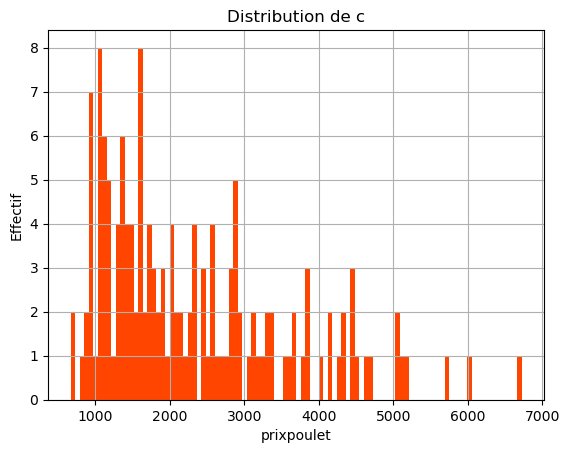

La valeur la + frequente est.... .. 0       669.4
1       720.1
2       792.4
3       890.6
4       904.3
        ...  
143    5091.4
144    5179.2
145    5710.6
146    6044.0
147    6719.9
Name: prixpoulet, Length: 148, dtype: float64
Le skew est........................ 1.07
Le kurtosis est................... 0.64 

P95 est............... 4666.48
Quartile 3 est........ 2925.06
Quartile 2 est........ 1921.26
Quartile 1 est........ 1336.05
L interquartile est... 1589.01 

L ecart type est...... 1263.43
Le seuil haut est..... 5308.57
Le seuil bas est...... -1047.46 

La mediane est........ 1921.2583333333332
La moyenne est........ 2307.81 

############################################ 



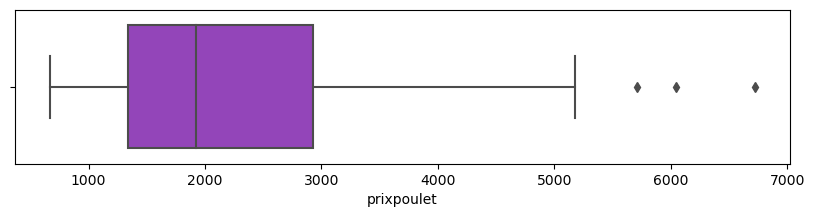

Selon la methode de l interquartile il y a 3 valeurs aberantes

#var 1 : liste contenant les valeurs aberantes

#var 2 : dataframe contenant les valeurs aberantes

#var 3 : dataframe SANS les valeurs aberantes

############################################ 

Selon la methode du zscore, il y a 1 valeurs aberantes

#var 4 : liste contenant les valeurs aberantes zscore

#var 5 : dataframe contenant les valeurs aberantes zscore

#var 6 : dataframe SANS les valeurs aberantes



In [442]:
a,b,c,d,e,f = outlierbox(poulet_voisined,'prixpoulet',3)

In [443]:
e

,Area,Area Code (FAO),prixpoulet,zscore
91,New Caledonia,153,6719.9,3.492159


#### Le prix du poulet moyen ( bio et non bio ) est de 2300 USD LA TONNE prix producteur, Nous ne sommes pas sur de garder cette variable car nous avons seulement le prix des poulet pour 148 pays

# Jointures

### Merge les 3 dataframes, poulet, pop et poli

In [444]:
poulet_voisined.rename(columns = {'Area Code (FAO)': 'Code zone'}, inplace = True) 


In [445]:
poulet_voisined.shape


(148, 3)

In [446]:
pop_voisined.shape

(238, 4)

In [447]:
poulet_voisined

,Area,Code zone,prixpoulet
0,Albania,3,2469.700000
1,Algeria,4,2180.700000
2,Antigua and Barbuda,8,3648.500000
3,Argentina,9,1120.000000
4,Armenia,1,2291.500000
...,...,...,...
143,Venezuela (Bolivarian Republic of),236,2852.433333
144,Viet Nam,237,3852.800000
145,Yemen,249,5091.400000
146,Zambia,251,2338.200000


In [448]:
pop_voisined

,Zone,Code zone,pop_2017,TCAM
0,Afghanistan,2,36296113.0,2.180893
1,Afrique du Sud,202,57009756.0,1.163683
2,Albanie,3,2884169.0,-0.093847
3,Algérie,4,41389189.0,1.643155
4,Allemagne,79,82658409.0,0.407719
...,...,...,...,...
233,Îles Salomon,25,636039.0,2.146691
234,Îles Turques-et-Caïques,224,37115.0,1.265856
235,Îles Vierges américaines,240,104751.0,-0.082714
236,Îles Vierges britanniques,239,29577.0,0.554714


In [449]:
df_final = pd.merge(pop_voisined, poulet_voisined, on='Code zone', how='left', indicator='true')


In [450]:
df_final.shape

(238, 7)

In [451]:
df_final

,Zone,Code zone,pop_2017,TCAM,Area,prixpoulet,true
0,Afghanistan,2,36296113.0,2.180893,NaN,NaN,left_only
1,Afrique du Sud,202,57009756.0,1.163683,South Africa,2015.10,both
2,Albanie,3,2884169.0,-0.093847,Albania,2469.70,both
3,Algérie,4,41389189.0,1.643155,Algeria,2180.70,both
4,Allemagne,79,82658409.0,0.407719,Germany,1204.25,both
...,...,...,...,...,...,...,...
233,Îles Salomon,25,636039.0,2.146691,NaN,NaN,left_only
234,Îles Turques-et-Caïques,224,37115.0,1.265856,NaN,NaN,left_only
235,Îles Vierges américaines,240,104751.0,-0.082714,NaN,NaN,left_only
236,Îles Vierges britanniques,239,29577.0,0.554714,NaN,NaN,left_only


In [452]:
dfsansprixpoulet = df_final.loc[df_final['true']== 'left_only',:]

In [453]:
dfsansprixpoulet

,Zone,Code zone,pop_2017,TCAM,Area,prixpoulet,true
0,Afghanistan,2,36296113.0,2.180893,NaN,NaN,left_only
5,Andorre,6,77001.0,-0.563548,NaN,NaN,left_only
6,Angola,7,29816766.0,2.719403,NaN,NaN,left_only
7,Anguilla,258,14584.0,0.862269,NaN,NaN,left_only
9,Antilles néerlandaises (ex),151,275186.0,0.772741,NaN,NaN,left_only
...,...,...,...,...,...,...,...
233,Îles Salomon,25,636039.0,2.146691,NaN,NaN,left_only
234,Îles Turques-et-Caïques,224,37115.0,1.265856,NaN,NaN,left_only
235,Îles Vierges américaines,240,104751.0,-0.082714,NaN,NaN,left_only
236,Îles Vierges britanniques,239,29577.0,0.554714,NaN,NaN,left_only


> 92 pays n'ont pas de prix du poulet

In [454]:
df_final.drop(['true',], axis=1, inplace=True) 

In [455]:
df_final

,Zone,Code zone,pop_2017,TCAM,Area,prixpoulet
0,Afghanistan,2,36296113.0,2.180893,NaN,NaN
1,Afrique du Sud,202,57009756.0,1.163683,South Africa,2015.10
2,Albanie,3,2884169.0,-0.093847,Albania,2469.70
3,Algérie,4,41389189.0,1.643155,Algeria,2180.70
4,Allemagne,79,82658409.0,0.407719,Germany,1204.25
...,...,...,...,...,...,...
233,Îles Salomon,25,636039.0,2.146691,NaN,NaN
234,Îles Turques-et-Caïques,224,37115.0,1.265856,NaN,NaN
235,Îles Vierges américaines,240,104751.0,-0.082714,NaN,NaN
236,Îles Vierges britanniques,239,29577.0,0.554714,NaN,NaN


In [456]:
poli

,,indexpolitic
Area,Area Code (FAO),
Afghanistan,2,-2.70
Albania,3,0.36
Algeria,4,-0.99
American Samoa,5,1.20
Andorra,6,1.41
...,...,...
Venezuela (Bolivarian Republic of),236,-1.16
Viet Nam,237,0.15
Yemen,249,-2.86


In [457]:
poli = poli.reset_index(drop=False)

In [458]:
poli

,Area,Area Code (FAO),indexpolitic
0,Afghanistan,2,-2.70
1,Albania,3,0.36
2,Algeria,4,-0.99
3,American Samoa,5,1.20
4,Andorra,6,1.41
...,...,...,...
192,Venezuela (Bolivarian Republic of),236,-1.16
193,Viet Nam,237,0.15
194,Yemen,249,-2.86
195,Zambia,251,0.13


In [459]:
poli.rename(columns = {'Area Code (FAO)':'Code zone'}, inplace = True) 

In [460]:
poli

,Area,Code zone,indexpolitic
0,Afghanistan,2,-2.70
1,Albania,3,0.36
2,Algeria,4,-0.99
3,American Samoa,5,1.20
4,Andorra,6,1.41
...,...,...,...
192,Venezuela (Bolivarian Republic of),236,-1.16
193,Viet Nam,237,0.15
194,Yemen,249,-2.86
195,Zambia,251,0.13


In [461]:
df_final = pd.merge(df_final, poli, on='Code zone', how='left', indicator='true')

In [462]:
df_final

,Zone,Code zone,pop_2017,TCAM,Area_x,prixpoulet,Area_y,indexpolitic,true
0,Afghanistan,2,36296113.0,2.180893,NaN,NaN,Afghanistan,-2.70,both
1,Afrique du Sud,202,57009756.0,1.163683,South Africa,2015.10,South Africa,-0.22,both
2,Albanie,3,2884169.0,-0.093847,Albania,2469.70,Albania,0.36,both
3,Algérie,4,41389189.0,1.643155,Algeria,2180.70,Algeria,-0.99,both
4,Allemagne,79,82658409.0,0.407719,Germany,1204.25,Germany,0.64,both
...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,25,636039.0,2.146691,NaN,NaN,Solomon Islands,0.43,both
234,Îles Turques-et-Caïques,224,37115.0,1.265856,NaN,NaN,NaN,NaN,left_only
235,Îles Vierges américaines,240,104751.0,-0.082714,NaN,NaN,NaN,NaN,left_only
236,Îles Vierges britanniques,239,29577.0,0.554714,NaN,NaN,NaN,NaN,left_only


In [463]:
df_final.loc[df_final['true']== 'right_only',:]

,Zone,Code zone,pop_2017,TCAM,Area_x,prixpoulet,Area_y,indexpolitic,true


> Affiche les pays qui n'ont pas de valeur pour l index politique

In [464]:
df_final.loc[df_final['true']== 'left_only',:]

,Zone,Code zone,pop_2017,TCAM,Area_x,prixpoulet,Area_y,indexpolitic,true
7,Anguilla,258,1.458400e+04,0.862269,NaN,NaN,NaN,NaN,left_only
9,Antilles néerlandaises (ex),151,2.751860e+05,0.772741,NaN,NaN,NaN,NaN,left_only
13,Aruba,22,1.053660e+05,0.395988,NaN,NaN,NaN,NaN,left_only
26,"Bonaire, Saint-Eustache et Saba",278,2.540100e+04,1.327791,NaN,NaN,NaN,NaN,left_only
44,"Chine, continentale",41,1.421022e+09,0.399718,"China, mainland",1974.450000,NaN,NaN,left_only
52,Curaçao,279,1.619970e+05,0.540761,NaN,NaN,NaN,NaN,left_only
68,Gibraltar,82,3.372800e+04,-0.004152,NaN,NaN,NaN,NaN,left_only
72,Guadeloupe,87,3.996720e+05,-0.073167,NaN,NaN,NaN,NaN,left_only
73,Guam,88,1.642810e+05,0.583405,NaN,NaN,NaN,NaN,left_only
79,Guyane française,69,2.751910e+05,2.119240,NaN,NaN,NaN,NaN,left_only


In [465]:
df_final.columns

Index(['Zone', 'Code zone', 'pop_2017', 'TCAM', 'Area_x', 'prixpoulet',
       'Area_y', 'indexpolitic', 'true'],
      dtype='object')

In [466]:
df_final.drop(['Area_x','Area_y',], axis=1, inplace=True) 

> Nous avons notre dataframe final avec une colonne pop_2017, le TCAM , le prix du poulet et l index politique

In [467]:
df_final

,Zone,Code zone,pop_2017,TCAM,prixpoulet,indexpolitic,true
0,Afghanistan,2,36296113.0,2.180893,NaN,-2.70,both
1,Afrique du Sud,202,57009756.0,1.163683,2015.10,-0.22,both
2,Albanie,3,2884169.0,-0.093847,2469.70,0.36,both
3,Algérie,4,41389189.0,1.643155,2180.70,-0.99,both
4,Allemagne,79,82658409.0,0.407719,1204.25,0.64,both
...,...,...,...,...,...,...,...
233,Îles Salomon,25,636039.0,2.146691,NaN,0.43,both
234,Îles Turques-et-Caïques,224,37115.0,1.265856,NaN,NaN,left_only
235,Îles Vierges américaines,240,104751.0,-0.082714,NaN,NaN,left_only
236,Îles Vierges britanniques,239,29577.0,0.554714,NaN,NaN,left_only


### exploration fichier dispo 2017

In [468]:
dispo2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv') 

In [469]:
dispo2017.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [470]:
# suppression colonnes
dispo2017.drop(['Code Domaine', 'Domaine', 'Code Élément', 'Code année', 'Unité', 'Symbole' , 'Description du Symbole'], axis=1, inplace=True) 



In [471]:
dispo2017.head(5)

,Code zone,Zone,Élément,Code Produit,Produit,Année,Valeur
0,2,Afghanistan,Production,2511,Blé et produits,2017,4281.0
1,2,Afghanistan,Importations - Quantité,2511,Blé et produits,2017,2302.0
2,2,Afghanistan,Variation de stock,2511,Blé et produits,2017,-119.0
3,2,Afghanistan,Exportations - Quantité,2511,Blé et produits,2017,0.0
4,2,Afghanistan,Disponibilité intérieure,2511,Blé et produits,2017,6701.0


In [472]:
#recherche le mot volailles

volaille = dispo2017['Produit'].str.contains('Volaille') 

In [473]:
dispo2017[volaille]

,Code zone,Zone,Élément,Code Produit,Produit,Année,Valeur
651,2,Afghanistan,Production,2734,Viande de Volailles,2017,28.00
652,2,Afghanistan,Importations - Quantité,2734,Viande de Volailles,2017,29.00
653,2,Afghanistan,Variation de stock,2734,Viande de Volailles,2017,0.00
654,2,Afghanistan,Disponibilité intérieure,2734,Viande de Volailles,2017,57.00
655,2,Afghanistan,Pertes,2734,Viande de Volailles,2017,2.00
...,...,...,...,...,...,...,...
176396,181,Zimbabwe,Nourriture,2734,Viande de Volailles,2017,67.00
176397,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,4.68
176398,181,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,16.00
176399,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,1.59


In [474]:
#le code produit pour volailles est 2734 , nous allons garder que ce code produit

In [475]:
poulet_dispo2017 = dispo2017.loc[dispo2017['Code Produit']== 2734,:]

In [476]:
poulet_dispo2017

,Code zone,Zone,Élément,Code Produit,Produit,Année,Valeur
651,2,Afghanistan,Production,2734,Viande de Volailles,2017,28.00
652,2,Afghanistan,Importations - Quantité,2734,Viande de Volailles,2017,29.00
653,2,Afghanistan,Variation de stock,2734,Viande de Volailles,2017,0.00
654,2,Afghanistan,Disponibilité intérieure,2734,Viande de Volailles,2017,57.00
655,2,Afghanistan,Pertes,2734,Viande de Volailles,2017,2.00
...,...,...,...,...,...,...,...
176396,181,Zimbabwe,Nourriture,2734,Viande de Volailles,2017,67.00
176397,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,4.68
176398,181,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,16.00
176399,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,1.59


In [477]:
poulet_dispo2017= poulet_dispo2017.reset_index(drop=True)

In [478]:
poulet_dispo2017

,Code zone,Zone,Élément,Code Produit,Produit,Année,Valeur
0,2,Afghanistan,Production,2734,Viande de Volailles,2017,28.00
1,2,Afghanistan,Importations - Quantité,2734,Viande de Volailles,2017,29.00
2,2,Afghanistan,Variation de stock,2734,Viande de Volailles,2017,0.00
3,2,Afghanistan,Disponibilité intérieure,2734,Viande de Volailles,2017,57.00
4,2,Afghanistan,Pertes,2734,Viande de Volailles,2017,2.00
...,...,...,...,...,...,...,...
2056,181,Zimbabwe,Nourriture,2734,Viande de Volailles,2017,67.00
2057,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,4.68
2058,181,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,16.00
2059,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,1.59


In [479]:
# On pivote la table

In [480]:
poulet_dispo2017 = poulet_dispo2017.pivot_table(index=['Zone','Code zone'], columns='Élément', values='Valeur')


In [481]:
poulet_dispo2017 = poulet_dispo2017.reset_index()

In [482]:
poulet_dispo2017

Élément,Zone,Code zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,2,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,202,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,3,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,4,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,79,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,225,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
168,Équateur,58,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
169,États-Unis d'Amérique,231,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
170,Éthiopie,238,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


In [483]:
explore(poulet_dispo2017)

############################################ 

Shape is :........  (172, 19) 

############################################ 

Culumns 

Index(['Zone', 'Code zone', 'Alimentation pour touristes',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 19 columns):
 #   Column                                                         Non-Null C

Élément,Zone,Code zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
count,172,172.000000,78.000000,1.0,34.000000,172.000000,172.000000,172.000000,172.000000,170.000000,135.000000,170.000000,170.000000,67.000000,168.000000,164.000000,1.0,46.000000,169.000000
unique,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,126.639535,0.217949,0.0,44.117647,74.558140,20.213372,4.898430,7.121279,687.594118,132.185185,89.529412,657.047059,43.582090,725.190476,-2.835366,0.0,26.282609,13.668639
std,NaN,72.976310,2.399391,NaN,142.433135,60.571277,15.860311,4.191336,5.603464,2187.184747,513.784440,186.669983,2136.545796,120.818816,2501.457125,13.579702,NaN,55.020668,75.364884
min,NaN,1.000000,-18.000000,0.0,0.000000,0.000000,0.130000,0.030000,0.040000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-125.000000,0.0,0.000000,-119.000000
25%,NaN,66.750000,0.000000,0.0,0.000000,22.000000,6.440000,1.460000,2.165000,30.500000,0.000000,3.000000,28.500000,1.000000,13.750000,0.000000,0.0,1.000000,0.000000
50%,NaN,121.500000,0.000000,0.0,2.000000,64.000000,18.090000,3.745000,6.505000,100.000000,3.000000,16.000000,99.500000,4.000000,70.000000,0.000000,0.0,4.000000,0.000000
75%,NaN,188.250000,0.000000,0.0,14.500000,105.500000,30.037500,6.597500,10.365000,368.250000,32.000000,81.250000,365.250000,29.500000,409.750000,0.000000,0.0,17.500000,7.000000


############################################ 

Sum of missing values 

Élément
Zone                                                               0
Code zone                                                          0
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                  

> on supprime les colonnes avec plus de 50% nan et qui ne nous serviront pas pour notre analyse

In [484]:
poulet_dispo2017.drop(['Alimentation pour touristes', 'Aliments pour animaux', 'Autres utilisations (non alimentaire)' , 'Semences', 'Traitement', 'Pertes','Résidus','Variation de stock' ], axis=1, inplace=True) 



In [485]:
poulet_dispo2017.head(5)

Élément,Zone,Code zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,2,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0
1,Afrique du Sud,202,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,3,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0
3,Algérie,4,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0
4,Allemagne,79,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0


In [486]:
df_final.head(2)

,Zone,Code zone,pop_2017,TCAM,prixpoulet,indexpolitic,true
0,Afghanistan,2,36296113.0,2.180893,NaN,-2.70,both
1,Afrique du Sud,202,57009756.0,1.163683,2015.1,-0.22,both


In [487]:
df_final.drop(['true',], axis=1, inplace=True) 

In [488]:
df_final.shape

(238, 6)

### Jointure du dataframe final precedent avec poulet_dispo2017

Nous decidons de travailler avec les pays pour lesquels nous avons des informations sur la dispo de poulet car c'est le coeur de notre étude. 172 pays

In [489]:
df_final3 = pd.merge(df_final, poulet_dispo2017, on='Code zone', how='right', indicator='true')


In [490]:
df_final3.head(5)

,Zone_x,Code zone,pop_2017,TCAM,prixpoulet,indexpolitic,Zone_y,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,true
0,Afghanistan,2,36296113.0,2.180893,NaN,-2.70,Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,both
1,Afrique du Sud,202,57009756.0,1.163683,2015.10,-0.22,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,both
2,Albanie,3,2884169.0,-0.093847,2469.70,0.36,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,both
3,Algérie,4,41389189.0,1.643155,2180.70,-0.99,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,both
4,Allemagne,79,82658409.0,0.407719,1204.25,0.64,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,both


In [491]:
# supprime les colonnes

In [492]:
df_final3.drop(['Zone_y','true'], axis=1, inplace=True) 

In [493]:
df_final3.head(5)

,Zone_x,Code zone,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,2,36296113.0,2.180893,NaN,-2.70,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0
1,Afrique du Sud,202,57009756.0,1.163683,2015.10,-0.22,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,3,2884169.0,-0.093847,2469.70,0.36,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0
3,Algérie,4,41389189.0,1.643155,2180.70,-0.99,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0
4,Allemagne,79,82658409.0,0.407719,1204.25,0.64,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0


In [494]:
df_final3.shape

(172, 15)

#### MERGE PIB DF_FINAL3

In [495]:
pib

,Area,Area Code (FAO),Pib_2017,TCAM_pib
0,Afghanistan,2,1.889635e+10,-1.185649
1,Albania,3,1.301973e+10,2.758801
2,Algeria,4,1.700970e+11,-3.881311
3,Andorra,6,3.000160e+09,-0.301228
4,Angola,7,1.221239e+11,-7.003129
...,...,...,...,...
206,Venezuela (Bolivarian Republic of),236,2.479302e+11,-10.909433
207,Viet Nam,237,2.237799e+11,5.660055
208,Yemen,249,2.073938e+10,-7.170181
209,Zambia,251,2.586816e+10,-0.287230


In [496]:
pib.rename(columns = {'Area Code (FAO)': 'Code zone'}, inplace = True) 

In [497]:
df_final3 = pd.merge(df_final3, pib, on='Code zone', how='left', indicator='true')


In [498]:
df_final3.loc[df_final3['true']== 'left_only',:]

,Zone_x,Code zone,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Area,Pib_2017,TCAM_pib,true
33,"Chine, Taiwan Province de",214,23674546.0,0.198837,NaN,0.89,126.0,33.17,8.7,11.01,785.0,8.0,161.0,785.0,652.0,NaN,NaN,NaN,left_only


> Pas de PIB pour Taiwan

In [499]:
df_final3.drop(['Area','true'], axis=1, inplace=True) 

## Investisements etrangers

In [500]:
invest = pd.read_csv('investment.csv')
invest.head(5)


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),2,Afghanistan,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,51.533897,X,Figure from international organizations,Data source: UNCTAD
1,FDI,Foreign Direct Investment (FDI),3,Albania,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,1016.561053,X,Figure from international organizations,Data source: UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Algeria,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,1232.341924,X,Figure from international organizations,Data source: UNCTAD
3,FDI,Foreign Direct Investment (FDI),7,Angola,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,-7397.300000,X,Figure from international organizations,Data source: UNCTAD
4,FDI,Foreign Direct Investment (FDI),258,Anguilla,6110,Value US$,23082,Total FDI inflows,2017,2017,millions,97.167478,X,Figure from international organizations,Data source: UNCTAD


In [501]:
invest.shape

(200, 15)

In [502]:
invest = invest.drop(columns=["Domain Code","Domain","Element Code","Element","Item Code","Item","Year Code","Year","Unit","Flag","Flag Description","Note"])

invest.rename(columns = {'Area Code (FAO)': 'Code zone'}, inplace = True) 

In [503]:
invest.head(5)

,Code zone,Area,Value
0,2,Afghanistan,51.533897
1,3,Albania,1016.561053
2,4,Algeria,1232.341924
3,7,Angola,-7397.300000
4,258,Anguilla,97.167478


In [504]:
explore(invest)

############################################ 

Shape is :........  (200, 3) 

############################################ 

Culumns 

Index(['Code zone', 'Area', 'Value'], dtype='object') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code zone  200 non-null    int64  
 1   Area       200 non-null    object 
 2   Value      200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB
None 

############################################ 



,Code zone,Area,Value
count,200.000000,200,200.000000
unique,NaN,200,NaN
top,NaN,Afghanistan,NaN
freq,NaN,1,NaN
mean,130.850000,NaN,8493.858705
std,77.397996,NaN,28784.960977
min,1.000000,NaN,-27368.646988
25%,62.500000,NaN,95.425531
50%,128.500000,NaN,893.426538
75%,196.250000,NaN,3706.875509


############################################ 

Sum of missing values 

Code zone    0
Area         0
Value        0
dtype: int64
############################################ 

Missing values ratio 

Code zone    0.0
Area         0.0
Value        0.0
dtype: float64
############################################
    RECHERCHE DE DOUBLONS PAR COLONNE       
############################################ 

La colonne Code zone possede 0 valeurs en double 

La colonne Area possede 0 valeurs en double 

La colonne Value possede 1 valeurs en double 

############################################ 

2      1
299    1
153    1
156    1
157    1
      ..
68     1
70     1
74     1
75     1
181    1
Name: Code zone, Length: 200, dtype: int64
---------------------------------- 

Afghanistan         1
Palestine           1
New Caledonia       1
New Zealand         1
Nicaragua           1
                   ..
France              1
French Polynesia    1
Gabon               1
Gambia              1
Zimbabwe

### MERGE

In [505]:



df_final3 = pd.merge(df_final3, invest, on='Code zone', how='left', indicator='true')


In [506]:


tetete = df_final3.loc[df_final3['true']== 'left_only',:]

In [507]:
tetete

,Zone_x,Code zone,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Area,Value,true
40,Cuba,49,11339254.0,0.05518,NaN,0.66,82.0,23.72,5.7,7.12,342.0,NaN,312.0,269.0,29.0,9.685100e+10,4.403746,NaN,NaN,left_only


>PAS DE VALEUR POUR INVESTISMENT A CUBA

In [508]:
df_final3.drop(['Area','true'], axis=1, inplace=True) 

In [509]:
df_final3.rename(columns = {'Value': 'Investment'}, inplace = True) 

In [510]:
df_final3

,Zone_x,Code zone,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment
0,Afghanistan,2,36296113.0,2.180893,NaN,-2.70,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,1.889635e+10,-1.185649,51.533897
1,Afrique du Sud,202,57009756.0,1.163683,2015.10,-0.22,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,3.490067e+11,0.976433,2008.360978
2,Albanie,3,2884169.0,-0.093847,2469.70,0.36,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,1.301973e+10,2.758801,1016.561053
3,Algérie,4,41389189.0,1.643155,2180.70,-0.99,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,1.700970e+11,-3.881311,1232.341924
4,Allemagne,79,82658409.0,0.407719,1204.25,0.64,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,3.690849e+12,0.476242,33261.034105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,225,9487203.0,0.888721,NaN,0.66,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,48.0,3.856055e+11,0.929045,10354.223000
168,Équateur,58,16785361.0,1.381235,1733.30,-0.10,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,340.0,1.042959e+11,1.121873,629.542412
169,États-Unis d'Amérique,231,325084756.0,0.523118,1201.50,0.45,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,21914.0,1.947962e+13,3.182714,308957.000000
170,Éthiopie,238,106399924.0,2.172783,3872.10,-1.52,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,14.0,7.679452e+10,8.169579,4017.100000


In [511]:
df_final3.set_index(['Zone_x', 'Code zone'], inplace=True) # defini comme index

In [512]:
df_final3

,,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment
Zone_x,Code zone,,,,,,,,,,,,,,,,
Afghanistan,2,36296113.0,2.180893,NaN,-2.70,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,1.889635e+10,-1.185649,51.533897
Afrique du Sud,202,57009756.0,1.163683,2015.10,-0.22,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,3.490067e+11,0.976433,2008.360978
Albanie,3,2884169.0,-0.093847,2469.70,0.36,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,1.301973e+10,2.758801,1016.561053
Algérie,4,41389189.0,1.643155,2180.70,-0.99,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,1.700970e+11,-3.881311,1232.341924
Allemagne,79,82658409.0,0.407719,1204.25,0.64,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,3.690849e+12,0.476242,33261.034105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,225,9487203.0,0.888721,NaN,0.66,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,48.0,3.856055e+11,0.929045,10354.223000
Équateur,58,16785361.0,1.381235,1733.30,-0.10,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,340.0,1.042959e+11,1.121873,629.542412
États-Unis d'Amérique,231,325084756.0,0.523118,1201.50,0.45,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,21914.0,1.947962e+13,3.182714,308957.000000


In [513]:
explore(df_final3)

############################################ 

Shape is :........  (172, 16) 

############################################ 

Culumns 

Index(['pop_2017', 'TCAM', 'prixpoulet', 'indexpolitic',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production', 'Pib_2017',
       'TCAM_pib', 'Investment'],
      dtype='object') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 172 entries, ('Afghanistan', 2) to ('Îles Salomon', 25)
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         ------

,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment
count,1.720000e+02,172.000000,133.000000,169.000000,172.000000,172.000000,172.000000,172.000000,170.000000,135.000000,170.000000,170.000000,168.000000,1.710000e+02,171.000000,171.000000
mean,4.284175e+07,1.025853,2243.357519,-0.063432,74.558140,20.213372,4.898430,7.121279,687.594118,132.185185,89.529412,657.047059,725.190476,4.663526e+11,1.344979,9100.351348
std,1.530637e+08,0.912891,1219.082024,0.892909,60.571277,15.860311,4.191336,5.603464,2187.184747,513.784440,186.669983,2136.545796,2501.457125,1.849267e+12,3.601998,30345.627610
min,5.204500e+04,-1.172969,669.400000,-2.860000,0.000000,0.130000,0.030000,0.040000,2.000000,0.000000,0.000000,2.000000,0.000000,1.881978e+08,-10.909433,-27368.646988
25%,2.874480e+06,0.394472,1309.100000,-0.600000,22.000000,6.440000,1.460000,2.165000,30.500000,0.000000,3.000000,28.500000,13.750000,1.147661e+10,-0.075378,166.962614
50%,9.757833e+06,0.895937,1919.033333,-0.010000,64.000000,18.090000,3.745000,6.505000,100.000000,3.000000,16.000000,99.500000,70.000000,4.417908e+10,1.894531,1065.298481
75%,3.013874e+07,1.715422,2852.433333,0.660000,105.500000,30.037500,6.597500,10.365000,368.250000,32.000000,81.250000,365.250000,409.750000,2.347067e+11,3.309392,4277.263030
max,1.421022e+09,3.699823,6719.900000,1.550000,243.000000,72.310000,17.860000,27.870000,18266.000000,4223.000000,1069.000000,18100.000000,21914.000000,1.947962e+13,9.272970,308957.000000


############################################ 

Sum of missing values 

pop_2017                                                          0
TCAM                                                              0
prixpoulet                                                       39
indexpolitic                                                      3
Disponibilité alimentaire (Kcal/personne/jour)                    0
Disponibilité alimentaire en quantité (kg/personne/an)            0
Disponibilité de matière grasse en quantité (g/personne/jour)     0
Disponibilité de protéines en quantité (g/personne/jour)          0
Disponibilité intérieure                                          2
Exportations - Quantité                                          37
Importations - Quantité                                           2
Nourriture                                                        2
Production                                                        4
Pib_2017                                     

# NAN

### Gestion des nan du df final

In [514]:
# créer un masque booléen pour identifier les valeurs manquantes
mask5 = df_final3.isna().any(axis=1)

# filtrer le DataFrame pour afficher les lignes avec des NaN
df_final3_nan = df_final3[mask5]


index_list_final3 = df_final3_nan.index.tolist()

In [515]:
df_final3_nan.head(50)

,,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment
Zone_x,Code zone,,,,,,,,,,,,,,,,
Afghanistan,2,3.629611e+07,2.180893,NaN,-2.70,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,1.889635e+10,-1.185649,51.533897
Angola,7,2.981677e+07,2.719403,NaN,-0.39,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,1.221239e+11,-7.003129,-7397.300000
Bahamas,12,3.817550e+05,0.796841,NaN,0.94,182.0,43.17,13.33,14.61,26.0,NaN,24.0,16.0,6.0,1.235975e+10,2.872299,901.448000
Bangladesh,16,1.596854e+08,0.872481,2085.533333,-1.18,7.0,1.50,0.51,0.47,250.0,NaN,0.0,240.0,249.0,2.456335e+11,9.272970,2151.640000
Botswana,20,2.205080e+06,1.536362,NaN,1.01,12.0,3.39,0.71,1.19,7.0,0.0,3.0,7.0,5.0,1.740550e+10,2.807067,260.575045
Burkina Faso,233,1.919323e+07,2.349637,1237.016667,-0.87,8.0,2.27,0.48,0.77,46.0,NaN,0.0,44.0,46.0,1.410696e+10,2.894674,2.572690
Bénin,53,1.117520e+07,2.228056,NaN,-0.03,37.0,14.40,1.71,4.98,161.0,0.0,123.0,161.0,18.0,1.270166e+10,3.266616,168.995366
Cabo Verde,35,5.374980e+05,0.965079,4469.300000,0.85,62.0,17.62,3.75,6.52,10.0,NaN,12.0,9.0,1.0,1.769787e+09,1.140214,109.483591
Cambodge,115,1.600941e+07,1.245597,2834.400000,0.12,11.0,2.34,0.85,0.74,38.0,NaN,10.0,37.0,28.0,2.217720e+10,7.929505,2788.084322


Nous refaisons un KNN IMPUTER sur l ensemble des données de notre dataframe

In [516]:
imputervoisinfinal = KNNImputer (n_neighbors=3)
X_finalvoisined = imputervoisinfinal.fit_transform(df_final3)
final3_voisined = pd.DataFrame(X_finalvoisined, columns=df_final3.columns, index=df_final3.index)


In [517]:
final3_voisined.loc[index_list_final3].head(50)

,,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment
Zone_x,Code zone,,,,,,,,,,,,,,,,
Afghanistan,2,3.629611e+07,2.180893,2944.200000,-2.700000,5.0,1.53,0.33,0.54,57.000000,5.333333,29.000000,55.000000,28.000000,1.889635e+10,-1.185649,51.533897
Angola,7,2.981677e+07,2.719403,1409.000000,-0.390000,35.0,10.56,2.22,3.60,319.000000,0.000000,277.000000,315.000000,42.000000,1.221239e+11,-7.003129,-7397.300000
Bahamas,12,3.817550e+05,0.796841,2039.311111,0.940000,182.0,43.17,13.33,14.61,26.000000,6.666667,24.000000,16.000000,6.000000,1.235975e+10,2.872299,901.448000
Bangladesh,16,1.596854e+08,0.872481,2085.533333,-1.180000,7.0,1.50,0.51,0.47,250.000000,6.666667,0.000000,240.000000,249.000000,2.456335e+11,9.272970,2151.640000
Botswana,20,2.205080e+06,1.536362,2284.488889,1.010000,12.0,3.39,0.71,1.19,7.000000,0.000000,3.000000,7.000000,5.000000,1.740550e+10,2.807067,260.575045
Burkina Faso,233,1.919323e+07,2.349637,1237.016667,-0.870000,8.0,2.27,0.48,0.77,46.000000,2.666667,0.000000,44.000000,46.000000,1.410696e+10,2.894674,2.572690
Bénin,53,1.117520e+07,2.228056,2039.311111,-0.030000,37.0,14.40,1.71,4.98,161.000000,0.000000,123.000000,161.000000,18.000000,1.270166e+10,3.266616,168.995366
Cabo Verde,35,5.374980e+05,0.965079,4469.300000,0.850000,62.0,17.62,3.75,6.52,10.000000,2.666667,12.000000,9.000000,1.000000,1.769787e+09,1.140214,109.483591
Cambodge,115,1.600941e+07,1.245597,2834.400000,0.120000,11.0,2.34,0.85,0.74,38.000000,3.333333,10.000000,37.000000,28.000000,2.217720e+10,7.929505,2788.084322


In [518]:
final3_voisined.head(50)

,,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment
Zone_x,Code zone,,,,,,,,,,,,,,,,
Afghanistan,2,3.629611e+07,2.180893,2944.200000,-2.700000,5.0,1.53,0.33,0.54,57.0,5.333333,29.0,55.0,28.0,1.889635e+10,-1.185649,51.533897
Afrique du Sud,202,5.700976e+07,1.163683,2015.100000,-0.220000,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,1667.0,3.490067e+11,0.976433,2008.360978
Albanie,3,2.884169e+06,-0.093847,2469.700000,0.360000,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,13.0,1.301973e+10,2.758801,1016.561053
Algérie,4,4.138919e+07,1.643155,2180.700000,-0.990000,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,275.0,1.700970e+11,-3.881311,1232.341924
Allemagne,79,8.265841e+07,0.407719,1204.250000,0.640000,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,1514.0,3.690849e+12,0.476242,33261.034105
Angola,7,2.981677e+07,2.719403,1409.000000,-0.390000,35.0,10.56,2.22,3.60,319.0,0.000000,277.0,315.0,42.0,1.221239e+11,-7.003129,-7397.300000
Antigua-et-Barbuda,8,9.542600e+04,0.792005,3648.500000,0.870000,233.0,54.10,17.55,17.77,7.0,0.000000,7.0,5.0,0.0,1.467978e+09,5.143549,151.271628
Arabie saoudite,194,3.310118e+07,1.740706,2850.166667,-0.590000,151.0,43.36,9.38,15.57,1435.0,10.000000,722.0,1435.0,616.0,6.885861e+11,0.785385,1418.843614
Argentine,9,4.393714e+07,0.795743,1120.000000,0.100000,182.0,42.24,13.84,13.53,1962.0,207.000000,8.0,1856.0,2161.0,6.436284e+11,-1.807331,11516.861462


# PIB hab 2017

### Creation pib par habitant en 2017

In [519]:
final3_voisined['Pib_hab17'] = final3_voisined['Pib_2017'] / final3_voisined['pop_2017'] 

In [520]:
explore(final3_voisined)

############################################ 

Shape is :........  (172, 17) 

############################################ 

Culumns 

Index(['pop_2017', 'TCAM', 'prixpoulet', 'indexpolitic',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production', 'Pib_2017',
       'TCAM_pib', 'Investment', 'Pib_hab17'],
      dtype='object') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 172 entries, ('Afghanistan', 2) to ('Îles Salomon', 25)
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                  

,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment,Pib_hab17
count,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000
mean,4.284175e+07,1.025853,2357.713049,-0.054147,74.558140,20.213372,4.898430,7.121279,683.451550,104.928295,89.620155,653.255814,713.897287,4.665548e+11,1.349988,9071.007262,14042.911026
std,1.530637e+08,0.912891,1169.926608,0.888350,60.571277,15.860311,4.191336,5.603464,2174.701489,457.821503,185.634389,2124.311724,2473.118539,1.843853e+12,3.592051,30259.214972,19350.114531
min,5.204500e+04,-1.172969,669.400000,-2.860000,0.000000,0.130000,0.030000,0.040000,2.000000,0.000000,0.000000,2.000000,0.000000,1.881978e+08,-10.909433,-27368.646988,450.900697
25%,2.874480e+06,0.394472,1407.250000,-0.592500,22.000000,6.440000,1.460000,2.165000,31.500000,0.000000,3.000000,29.500000,14.750000,1.150203e+10,-0.075247,167.978990,2009.670178
50%,9.757833e+06,0.895937,2129.541667,0.015000,64.000000,18.090000,3.745000,6.505000,105.000000,2.666667,16.000000,101.000000,74.500000,4.596891e+10,1.898243,1086.349241,6024.249890
75%,3.013874e+07,1.715422,2983.516667,0.665000,105.500000,30.037500,6.597500,10.365000,372.750000,16.250000,82.500000,373.500000,368.750000,2.462077e+11,3.302433,4226.954015,16943.173285
max,1.421022e+09,3.699823,6719.900000,1.550000,243.000000,72.310000,17.860000,27.870000,18266.000000,4223.000000,1069.000000,18100.000000,21914.000000,1.947962e+13,9.272970,308957.000000,111017.182246


############################################ 

Sum of missing values 

pop_2017                                                         0
TCAM                                                             0
prixpoulet                                                       0
indexpolitic                                                     0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Production                                                       0
Pib_2017                                                  

# outliers

### Recherche des outliers avec Isolation foret

In [521]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

> On normalise nos données

In [522]:
B = final3_voisined.values

In [523]:
scaler2 = StandardScaler() #MinMaxScaler(feature_range=(-1, 1))

In [524]:
B = scaler2.fit_transform(B)

In [525]:
# initialiser le modèle Isolation Forest
iso_foresttest = IsolationForest(contamination=0.01)


# ajuster le modèle aux données
iso_foresttest.fit(B)

# prédire les anomalies dans les données
outlierstest = iso_foresttest.predict(B)

# imprimer les indices des valeurs aberrantes dans les données
print('Indices des valeurs aberrantes :')
print(final3_voisined.index[outlierstest == -1])
outliers_listtest = final3_voisined.index[outlierstest == -1].tolist()


Indices des valeurs aberrantes :
MultiIndex([(  'Chine, continentale',  41),
            ('États-Unis d'Amérique', 231)],
           names=['Zone_x', 'Code zone'])


### representation des outliers sur les 2 premieres dimensions

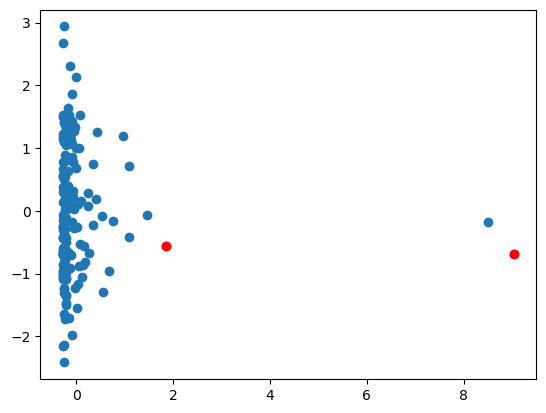

In [526]:
# créer un scatter plot des deux premières colonnes
plt.scatter(B[:, 0], B[:, 1])

# ajouter des marqueurs pour les valeurs aberrantes
plt.scatter(B[outlierstest == -1, 0], B[outlierstest == -1, 1], color='red')

# afficher le plot
plt.show()

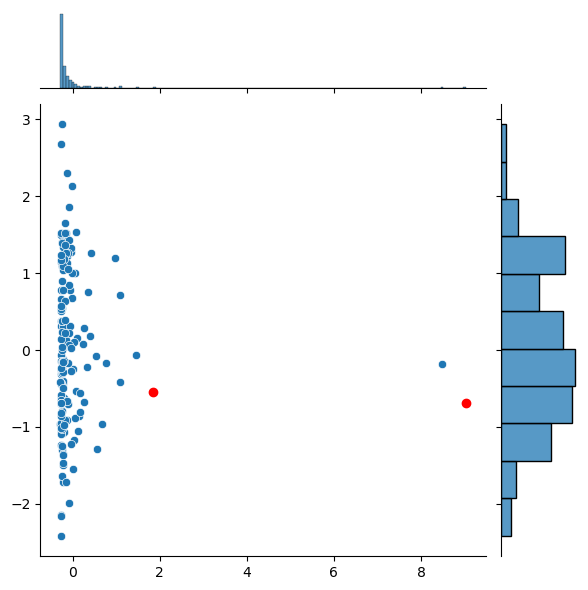

In [527]:
sns.jointplot(x=B[:, 0], y=B[:, 1], kind="scatter")
# ajouter des marqueurs pour les valeurs aberrantes
plt.scatter(B[outlierstest == -1, 0], B[outlierstest == -1, 1], color='red')

# afficher le plot
plt.show()

# MATRICE DE CORRELATION

In [528]:

# Calculer la matrice de corrélation
corr_matrix = final3_voisined.corr()

# Afficher la matrice de corrélation avec une coloration en dégradé
corr_matrix.style.background_gradient(cmap='coolwarm')

,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pib_2017,TCAM_pib,Investment,Pib_hab17
pop_2017,1.000000,-0.040530,-0.123594,-0.098297,-0.070650,-0.089377,-0.053117,-0.093954,0.675900,0.208827,0.150992,0.656902,0.618888,0.565608,0.106956,0.424090,-0.045870
TCAM,-0.040530,1.000000,0.339580,-0.403488,-0.387318,-0.389777,-0.364165,-0.404568,-0.120266,-0.142129,-0.128451,-0.120762,-0.127127,-0.137662,0.000790,-0.145770,-0.257483
prixpoulet,-0.123594,0.339580,1.000000,-0.040987,-0.060007,-0.053220,-0.051576,-0.072287,-0.183758,-0.195581,-0.143487,-0.179543,-0.189903,-0.165744,0.108710,-0.155942,-0.136375
indexpolitic,-0.098297,-0.403488,-0.040987,1.000000,0.453003,0.444909,0.429946,0.467219,0.007871,0.055361,0.101865,0.009934,0.014016,0.106442,0.206350,0.142746,0.552558
Disponibilité alimentaire (Kcal/personne/jour),-0.070650,-0.387318,-0.060007,0.453003,1.000000,0.988240,0.988678,0.972563,0.209465,0.263719,0.169243,0.214881,0.221476,0.177734,-0.014634,0.258305,0.379497
Disponibilité alimentaire en quantité (kg/personne/an),-0.089377,-0.389777,-0.053220,0.444909,0.988240,1.000000,0.960515,0.986109,0.181628,0.235638,0.175425,0.187452,0.191240,0.157129,-0.034372,0.237728,0.377365
Disponibilité de matière grasse en quantité (g/personne/jour),-0.053117,-0.364165,-0.051576,0.429946,0.988678,0.960515,1.000000,0.926726,0.224957,0.269584,0.135869,0.230470,0.238450,0.177224,-0.009982,0.242228,0.322490
Disponibilité de protéines en quantité (g/personne/jour),-0.093954,-0.404568,-0.072287,0.467219,0.972563,0.986109,0.926726,1.000000,0.175916,0.244693,0.213098,0.180877,0.185469,0.169873,-0.020532,0.271286,0.451502
Disponibilité intérieure,0.675900,-0.120266,-0.183758,0.007871,0.209465,0.181628,0.224957,0.175916,1.000000,0.685321,0.262273,0.998720,0.987966,0.904269,-0.005788,0.792660,0.113848
Exportations - Quantité,0.208827,-0.142129,-0.195581,0.055361,0.263719,0.235638,0.269584,0.244693,0.685321,1.000000,0.158803,0.697635,0.777314,0.614716,-0.074737,0.662290,0.197737


> Les dimensions 5,6,7,8 sont tres correlées, nous decidons de garder seulement`Disponibilité alimentaire (Kcal/personne/jour)`
Production, nourriture et dispo interieure sont tres correlees , nous gardons `nourriture` qui correspond à la consomation de poulet
`Nourriture` et `pib_2017` sont également très corrélés positivement , on en deduit qu'elles représentent la meme info ( plus les habitants d un pays mangent du poulet , plus les pib du pays est élevé ), nous decidons donc de ne pas garder le pib de 2017



In [532]:
final3_voisined = final3_voisined.drop(columns=["Disponibilité alimentaire en quantité (kg/personne/an)", 'Disponibilité de matière grasse en quantité (g/personne/jour)',
                                                'Disponibilité de protéines en quantité (g/personne/jour)','Production','Disponibilité intérieure','Pib_2017'])


In [533]:
# Calculer la matrice de corrélation
corr_matrix = final3_voisined.corr()

<Axes: >

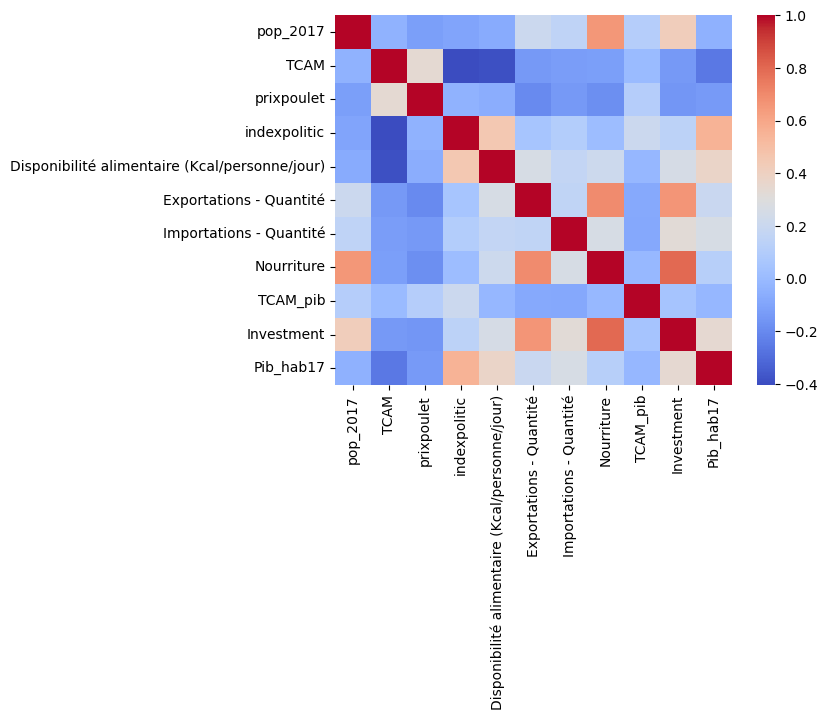

In [534]:
# représenter graphiquement la matrice de corrélation avec Seaborn
sns.heatmap(corr_matrix, cmap="coolwarm")

> On enregistre le CSV

In [535]:
final3_voisined.to_csv('data_p9.csv')

In [536]:
final3_voisined

,,pop_2017,TCAM,prixpoulet,indexpolitic,Disponibilité alimentaire (Kcal/personne/jour),Exportations - Quantité,Importations - Quantité,Nourriture,TCAM_pib,Investment,Pib_hab17
Zone_x,Code zone,,,,,,,,,,,
Afghanistan,2,36296113.0,2.180893,2944.200000,-2.70,5.0,5.333333,29.0,55.0,-1.185649,51.533897,520.616409
Afrique du Sud,202,57009756.0,1.163683,2015.100000,-0.22,143.0,63.000000,514.0,2035.0,0.976433,2008.360978,6121.876572
Albanie,3,2884169.0,-0.093847,2469.700000,0.36,85.0,0.000000,38.0,47.0,2.758801,1016.561053,4514.204908
Algérie,4,41389189.0,1.643155,2180.700000,-0.99,22.0,0.000000,2.0,264.0,-3.881311,1232.341924,4109.696001
Allemagne,79,82658409.0,0.407719,1204.250000,0.64,71.0,646.000000,842.0,1609.0,0.476242,33261.034105,44651.829102
...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,225,9487203.0,0.888721,2203.677778,0.66,147.0,94.000000,433.0,412.0,0.929045,10354.223000,40644.804043
Équateur,58,16785361.0,1.381235,1733.300000,-0.10,83.0,0.000000,0.0,324.0,1.121873,629.542412,6213.501276
États-Unis d'Amérique,231,325084756.0,0.523118,1201.500000,0.45,219.0,3692.000000,123.0,18100.0,3.182714,308957.000000,59921.674703


# FIN